In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import SeisBlast as sb

In [3]:
#Read catalogue and bulletins
seisblast_files = '/home/bmelo/bin/SeisBlast/files'
s_bul_dir = "/mnt/store/senad/repos/for_bruna/SEISCOMP_EVENTS/BULLETINS/"
j_bul_dir = "/mnt/REPO/QUARRY-BLASTS/BULLETINS/"
quarry_catalogue = pd.read_csv(f'{seisblast_files}/JSmutual_catalogue.csv')
#set up the dataframe
unnamed_cols = quarry_catalogue.columns[quarry_catalogue.columns.str.contains('^Unnamed')]
quarry_catalogue = quarry_catalogue.drop(columns=unnamed_cols)
quarry_catalogue

,EVENT-ID,DATE,TIME,LAT(deg),LAT-ERR(km),LON(deg),LON-ERR(km),DEPTH(km),RMS(s),AZ-GAP(deg),N_PHASES,MAG(ML)
0,dias2013ounh,2013-07-30,10:56:29.388,54.11401,0.847,-8.17115,1.370,0.0,0.451,77.3,36,1.18
1,dias2013psgr,2013-08-12,10:51:10.146,54.82306,2.148,-6.06838,1.228,0.0,0.612,105.1,25,1.24
2,dias2013qvsa,2013-08-28,13:32:30.950,52.89928,1.061,-9.06385,1.245,0.0,0.316,93.1,35,1.30
3,dias2013qxms,2013-08-29,13:07:57.382,53.37685,1.126,-9.19604,1.019,0.0,0.481,86.4,42,1.17
4,dias2013rlzk,2013-09-06,11:26:58.830,54.58620,1.844,-5.78568,1.187,0.0,0.864,83.3,23,1.08
...,...,...,...,...,...,...,...,...,...,...,...,...
452,dias2014youk,2014-12-16,15:03:55.757,53.43753,1.182,-7.13625,1.406,0.0,0.517,74.2,22,0.84
453,dias2014yqky,2014-12-17,12:33:37.545,54.18931,1.308,-7.71352,1.613,0.0,0.384,95.9,21,1.05
454,dias2014yqlg,2014-12-17,12:43:34.385,54.30775,1.774,-6.61528,1.897,0.0,0.305,79.2,12,0.84
455,dias2014yqnf,2014-12-17,13:42:33.755,53.97838,0.864,-8.25212,1.332,0.0,0.404,82.2,36,1.34


In [4]:
#read one event as an example
event_id = 'dias2013psgr'
ev_diff_picks, P1, P2, S1, S2 = sb.diff_picks(quarry_catalogue,event_id,s_bul_dir,j_bul_dir)
S1
#lala,info = sb.list_picks(quarry_catalogue,s_bul_dir,event_id)
#ev_diff_picks['time1']['P'].count()
#lala

-- reading event id: dias2013psgr --

    > bulletin_1 has 13 P times; bulletin_2 has 14
    > No common station and phase picks found between the two bulletins



/mnt/home_geo/bmelo/bin/SeisBlast/SeisBlast/SeisBlast/compare_picktimes.py:95: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  merge_picks = pd.merge(bul1_picks.sort_index(), bul2_picks.sort_index(), on=['sta','net'], how='inner', suffixes=['1','2'])


0

In [5]:
#read all events ids in a loop and make pick comparison
P_total_s_picks = 0
P_total_j_picks = 0
S_total_s_picks = 0
S_total_j_picks = 0
all_picks = []

for id in quarry_catalogue['EVENT-ID']: #.iloc[:10]:
    ev_diff_picks, P_s_picks, P_j_picks, S_s_picks, S_j_picks = sb.diff_picks(quarry_catalogue, id, s_bul_dir, j_bul_dir)
    
    if ev_diff_picks is not None:
        for i in range(ev_diff_picks.shape[0]):
            all_picks.append([
                id,
                ev_diff_picks.iloc[i]['sta'].item(),
                ev_diff_picks.iloc[i]['net'].item(),
                ev_diff_picks.iloc[i]['Ptime1_seconds'].item(),
                ev_diff_picks.iloc[i]['Ptime2_seconds'].item(),
                ev_diff_picks.iloc[i]['Ptime_diff_seconds'].item()
            ])
    # Sum the values of s_picks and j_picks
    P_total_s_picks += P_s_picks
    P_total_j_picks += P_j_picks
    S_total_s_picks += S_s_picks
    S_total_j_picks += S_j_picks

all_picks = pd.DataFrame(all_picks, columns=['id', 'sta', 'net','time1 (s)', 'time2 (s)', 'time_diff (s)'])


-- reading event id: dias2013ounh --

    > bulletin_1 has 16 P times; bulletin_2 has 22
    > out of 15 common station and phase picks. 1 pick times are different

-- reading event id: dias2013psgr --

    > bulletin_1 has 13 P times; bulletin_2 has 14
    > No common station and phase picks found between the two bulletins

-- reading event id: dias2013qvsa --

    > bulletin_1 has 20 P times; bulletin_2 has 18
    > No common station and phase picks found between the two bulletins

-- reading event id: dias2013qxms --

    > bulletin_1 has 25 P times; bulletin_2 has 27
    > No common station and phase picks found between the two bulletins

-- reading event id: dias2013rlzk --

    > bulletin_1 has 17 P times; bulletin_2 has 12
    > No common station and phase picks found between the two bulletins

-- reading event id: dias2013rmcr --

    > bulletin_1 has 33 P times; bulletin_2 has 31
    > out of 27 common station and phase picks. 1 pick times are different

-- reading event id: d

/mnt/home_geo/bmelo/bin/SeisBlast/SeisBlast/SeisBlast/compare_picktimes.py:95: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  merge_picks = pd.merge(bul1_picks.sort_index(), bul2_picks.sort_index(), on=['sta','net'], how='inner', suffixes=['1','2'])
/mnt/home_geo/bmelo/bin/SeisBlast/SeisBlast/SeisBlast/compare_picktimes.py:95: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  merge_picks = pd.merge(bul1_picks.sort_index(), bul2_picks.sort_index(), on=['sta','net'], how='inner', suffixes=['1','2'])
/mnt/home_geo/bmelo/bin/SeisBlast/SeisBlast/SeisBlast/compare_picktimes.py:95: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  merge_picks = pd.merge(bul1_picks.sort_index(), bul2_picks.sort_index(), on=['sta','net'], how='inner', suffixes=['1','2'])
/mnt/home_geo/bmelo/bin/SeisBlast/SeisBlast/SeisBlast/c

    > bulletin_1 has 23 P times; bulletin_2 has 21
    > No common station and phase picks found between the two bulletins

-- reading event id: dias2013rrkw --

    > bulletin_1 has 15 P times; bulletin_2 has 11
    > out of 11 common station and phase picks. 1 pick times are different

-- reading event id: dias2013rrls --

    > bulletin_1 has 28 P times; bulletin_2 has 29
    > No common station and phase picks found between the two bulletins

-- reading event id: dias2013rrny --

    > bulletin_1 has 13 P times; bulletin_2 has 9
    > out of 9 common station and phase picks. 2 pick times are different

-- reading event id: dias2013rrpj --

    > bulletin_1 has 13 P times; bulletin_2 has 12
    > No common station and phase picks found between the two bulletins

-- reading event id: dias2013rrqx --

    > bulletin_1 has 25 P times; bulletin_2 has 23
    > No common station and phase picks found between the two bulletins

-- reading event id: dias2013rtkg --

    > bulletin_1 has 20 

/mnt/home_geo/bmelo/bin/SeisBlast/SeisBlast/SeisBlast/compare_picktimes.py:95: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  merge_picks = pd.merge(bul1_picks.sort_index(), bul2_picks.sort_index(), on=['sta','net'], how='inner', suffixes=['1','2'])
/mnt/home_geo/bmelo/bin/SeisBlast/SeisBlast/SeisBlast/compare_picktimes.py:95: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  merge_picks = pd.merge(bul1_picks.sort_index(), bul2_picks.sort_index(), on=['sta','net'], how='inner', suffixes=['1','2'])
/mnt/home_geo/bmelo/bin/SeisBlast/SeisBlast/SeisBlast/compare_picktimes.py:95: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  merge_picks = pd.merge(bul1_picks.sort_index(), bul2_picks.sort_index(), on=['sta','net'], how='inner', suffixes=['1','2'])
/mnt/home_geo/bmelo/bin/SeisBlast/SeisBlast/SeisBlast/c

    > bulletin_1 has 15 P times; bulletin_2 has 17
    > No common station and phase picks found between the two bulletins

-- reading event id: dias2013rtld --

    > bulletin_1 has 21 P times; bulletin_2 has 22
    > No common station and phase picks found between the two bulletins

-- reading event id: dias2013rtnn --

    > bulletin_1 has 20 P times; bulletin_2 has 20
    > No common station and phase picks found between the two bulletins

-- reading event id: dias2013rvam --

    > bulletin_1 has 20 P times; bulletin_2 has 17
    > No common station and phase picks found between the two bulletins

-- reading event id: dias2013rvbq --

    > bulletin_1 has 22 P times; bulletin_2 has 19
    > No common station and phase picks found between the two bulletins

-- reading event id: dias2013rvco --

    > bulletin_1 has 27 P times; bulletin_2 has 30
    > No common station and phase picks found between the two bulletins

-- reading event id: dias2013rvfe --

    > bulletin_1 has 21 P ti

/mnt/home_geo/bmelo/bin/SeisBlast/SeisBlast/SeisBlast/compare_picktimes.py:95: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  merge_picks = pd.merge(bul1_picks.sort_index(), bul2_picks.sort_index(), on=['sta','net'], how='inner', suffixes=['1','2'])
/mnt/home_geo/bmelo/bin/SeisBlast/SeisBlast/SeisBlast/compare_picktimes.py:95: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  merge_picks = pd.merge(bul1_picks.sort_index(), bul2_picks.sort_index(), on=['sta','net'], how='inner', suffixes=['1','2'])
/mnt/home_geo/bmelo/bin/SeisBlast/SeisBlast/SeisBlast/compare_picktimes.py:95: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  merge_picks = pd.merge(bul1_picks.sort_index(), bul2_picks.sort_index(), on=['sta','net'], how='inner', suffixes=['1','2'])
/mnt/home_geo/bmelo/bin/SeisBlast/SeisBlast/SeisBlast/c

    > bulletin_1 has 32 P times; bulletin_2 has 23
    > No common station and phase picks found between the two bulletins

-- reading event id: dias2013rvhm --

    > bulletin_1 has 14 P times; bulletin_2 has 14
    > No common station and phase picks found between the two bulletins

-- reading event id: dias2013rxdn --

    > bulletin_1 has 23 P times; bulletin_2 has 21
    > No common station and phase picks found between the two bulletins

-- reading event id: dias2013rxjf --

    > bulletin_1 has 18 P times; bulletin_2 has 18
    > No common station and phase picks found between the two bulletins

-- reading event id: dias2013rxji --

    > bulletin_1 has 19 P times; bulletin_2 has 16
    > No common station and phase picks found between the two bulletins

-- reading event id: dias2013ryva --

    > bulletin_1 has 18 P times; bulletin_2 has 19
    > No common station and phase picks found between the two bulletins

-- reading event id: dias2013ryzl --

    > bulletin_1 has 34 P ti

/mnt/home_geo/bmelo/bin/SeisBlast/SeisBlast/SeisBlast/compare_picktimes.py:95: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  merge_picks = pd.merge(bul1_picks.sort_index(), bul2_picks.sort_index(), on=['sta','net'], how='inner', suffixes=['1','2'])
/mnt/home_geo/bmelo/bin/SeisBlast/SeisBlast/SeisBlast/compare_picktimes.py:95: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  merge_picks = pd.merge(bul1_picks.sort_index(), bul2_picks.sort_index(), on=['sta','net'], how='inner', suffixes=['1','2'])
/mnt/home_geo/bmelo/bin/SeisBlast/SeisBlast/SeisBlast/compare_picktimes.py:95: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  merge_picks = pd.merge(bul1_picks.sort_index(), bul2_picks.sort_index(), on=['sta','net'], how='inner', suffixes=['1','2'])
/mnt/home_geo/bmelo/bin/SeisBlast/SeisBlast/SeisBlast/c

    > bulletin_1 has 18 P times; bulletin_2 has 12
    > No common station and phase picks found between the two bulletins

-- reading event id: dias2013selh --

    > bulletin_1 has 15 P times; bulletin_2 has 12
    > No common station and phase picks found between the two bulletins

-- reading event id: dias2013selt --

    > bulletin_1 has 15 P times; bulletin_2 has 8
    > No common station and phase picks found between the two bulletins

-- reading event id: dias2013sger --

    > bulletin_1 has 21 P times; bulletin_2 has 12
    > out of 12 common station and phase picks. 1 pick times are different

-- reading event id: dias2013sgfx --

    > bulletin_1 has 20 P times; bulletin_2 has 18
    > out of 18 common station and phase picks. 2 pick times are different

-- reading event id: dias2013sghb --

    > bulletin_1 has 20 P times; bulletin_2 has 22
    > No common station and phase picks found between the two bulletins

-- reading event id: dias2013shzb --

    > bulletin_1 has 13

/mnt/home_geo/bmelo/bin/SeisBlast/SeisBlast/SeisBlast/compare_picktimes.py:95: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  merge_picks = pd.merge(bul1_picks.sort_index(), bul2_picks.sort_index(), on=['sta','net'], how='inner', suffixes=['1','2'])
/mnt/home_geo/bmelo/bin/SeisBlast/SeisBlast/SeisBlast/compare_picktimes.py:95: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  merge_picks = pd.merge(bul1_picks.sort_index(), bul2_picks.sort_index(), on=['sta','net'], how='inner', suffixes=['1','2'])
/mnt/home_geo/bmelo/bin/SeisBlast/SeisBlast/SeisBlast/compare_picktimes.py:95: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  merge_picks = pd.merge(bul1_picks.sort_index(), bul2_picks.sort_index(), on=['sta','net'], how='inner', suffixes=['1','2'])
/mnt/home_geo/bmelo/bin/SeisBlast/SeisBlast/SeisBlast/c

    > bulletin_1 has 8 P times; bulletin_2 has 10
    > No common station and phase picks found between the two bulletins

-- reading event id: dias2013sjte --

    > bulletin_1 has 6 P times; bulletin_2 has 9
    > No common station and phase picks found between the two bulletins

-- reading event id: dias2013sjuw --

    > bulletin_1 has 13 P times; bulletin_2 has 13
    > No common station and phase picks found between the two bulletins

-- reading event id: dias2013sjyc --

    > bulletin_1 has 15 P times; bulletin_2 has 22
    > out of 15 common station and phase picks. 1 pick times are different

-- reading event id: dias2013slpj --

    > bulletin_1 has 11 P times; bulletin_2 has 16
    > out of 10 common station and phase picks. 1 pick times are different

-- reading event id: dias2013slrw --

    > bulletin_1 has 6 P times; bulletin_2 has 14
    > No common station and phase picks found between the two bulletins

-- reading event id: dias2013slvq --

    > bulletin_1 has 13 P 

/mnt/home_geo/bmelo/bin/SeisBlast/SeisBlast/SeisBlast/compare_picktimes.py:95: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  merge_picks = pd.merge(bul1_picks.sort_index(), bul2_picks.sort_index(), on=['sta','net'], how='inner', suffixes=['1','2'])
/mnt/home_geo/bmelo/bin/SeisBlast/SeisBlast/SeisBlast/compare_picktimes.py:95: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  merge_picks = pd.merge(bul1_picks.sort_index(), bul2_picks.sort_index(), on=['sta','net'], how='inner', suffixes=['1','2'])
/mnt/home_geo/bmelo/bin/SeisBlast/SeisBlast/SeisBlast/compare_picktimes.py:95: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  merge_picks = pd.merge(bul1_picks.sort_index(), bul2_picks.sort_index(), on=['sta','net'], how='inner', suffixes=['1','2'])
/mnt/home_geo/bmelo/bin/SeisBlast/SeisBlast/SeisBlast/c

    > bulletin_1 has 22 P times; bulletin_2 has 34
    > out of 21 common station and phase picks. 2 pick times are different

-- reading event id: dias2013ssvz --

    > bulletin_1 has 21 P times; bulletin_2 has 28
    > No common station and phase picks found between the two bulletins

-- reading event id: dias2013sszp --

    > bulletin_1 has 10 P times; bulletin_2 has 18
    > No common station and phase picks found between the two bulletins

-- reading event id: dias2013sszz --

    > bulletin_1 has 7 P times; bulletin_2 has 12
    > No common station and phase picks found between the two bulletins

-- reading event id: dias2013stbn --

    > bulletin_1 has 16 P times; bulletin_2 has 21
    > out of 16 common station and phase picks. 1 pick times are different

-- reading event id: dias2013stdn --

    > bulletin_1 has 21 P times; bulletin_2 has 33
    > No common station and phase picks found between the two bulletins

-- reading event id: dias2013suor --

    > bulletin_1 has 23

/mnt/home_geo/bmelo/bin/SeisBlast/SeisBlast/SeisBlast/compare_picktimes.py:95: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  merge_picks = pd.merge(bul1_picks.sort_index(), bul2_picks.sort_index(), on=['sta','net'], how='inner', suffixes=['1','2'])
/mnt/home_geo/bmelo/bin/SeisBlast/SeisBlast/SeisBlast/compare_picktimes.py:95: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  merge_picks = pd.merge(bul1_picks.sort_index(), bul2_picks.sort_index(), on=['sta','net'], how='inner', suffixes=['1','2'])
/mnt/home_geo/bmelo/bin/SeisBlast/SeisBlast/SeisBlast/compare_picktimes.py:95: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  merge_picks = pd.merge(bul1_picks.sort_index(), bul2_picks.sort_index(), on=['sta','net'], how='inner', suffixes=['1','2'])
/mnt/home_geo/bmelo/bin/SeisBlast/SeisBlast/SeisBlast/c

    > bulletin_1 has 13 P times; bulletin_2 has 10
    > No common station and phase picks found between the two bulletins

-- reading event id: dias2013suwc --

    > bulletin_1 has 14 P times; bulletin_2 has 17
    > out of 11 common station and phase picks. 2 pick times are different

-- reading event id: dias2013suxd --

    > bulletin_1 has 11 P times; bulletin_2 has 17
    > No common station and phase picks found between the two bulletins

-- reading event id: dias2013suyf --

    > bulletin_1 has 6 P times; bulletin_2 has 16
    > out of 6 common station and phase picks. 1 pick times are different

-- reading event id: dias2013swnr --



/mnt/home_geo/bmelo/bin/SeisBlast/SeisBlast/SeisBlast/compare_picktimes.py:95: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  merge_picks = pd.merge(bul1_picks.sort_index(), bul2_picks.sort_index(), on=['sta','net'], how='inner', suffixes=['1','2'])
/mnt/home_geo/bmelo/bin/SeisBlast/SeisBlast/SeisBlast/compare_picktimes.py:95: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  merge_picks = pd.merge(bul1_picks.sort_index(), bul2_picks.sort_index(), on=['sta','net'], how='inner', suffixes=['1','2'])
/mnt/home_geo/bmelo/bin/SeisBlast/SeisBlast/SeisBlast/compare_picktimes.py:95: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  merge_picks = pd.merge(bul1_picks.sort_index(), bul2_picks.sort_index(), on=['sta','net'], how='inner', suffixes=['1','2'])


    > bulletin_1 has 14 P times; bulletin_2 has 15
    > No common station and phase picks found between the two bulletins

-- reading event id: dias2013swpa --

    > bulletin_1 has 15 P times; bulletin_2 has 23
    > No common station and phase picks found between the two bulletins

-- reading event id: dias2013swpy --

    > bulletin_1 has 24 P times; bulletin_2 has 23
    > No common station and phase picks found between the two bulletins

-- reading event id: dias2013swqq --

    > bulletin_1 has 22 P times; bulletin_2 has 23
    > No common station and phase picks found between the two bulletins

-- reading event id: dias2013swqz --

    > bulletin_1 has 13 P times; bulletin_2 has 10
    > out of 10 common station and phase picks. 1 pick times are different

-- reading event id: dias2013syig --

    > bulletin_1 has 19 P times; bulletin_2 has 17
    > No common station and phase picks found between the two bulletins

-- reading event id: dias2013symo --

    > bulletin_1 has 12 P

/mnt/home_geo/bmelo/bin/SeisBlast/SeisBlast/SeisBlast/compare_picktimes.py:95: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  merge_picks = pd.merge(bul1_picks.sort_index(), bul2_picks.sort_index(), on=['sta','net'], how='inner', suffixes=['1','2'])
/mnt/home_geo/bmelo/bin/SeisBlast/SeisBlast/SeisBlast/compare_picktimes.py:95: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  merge_picks = pd.merge(bul1_picks.sort_index(), bul2_picks.sort_index(), on=['sta','net'], how='inner', suffixes=['1','2'])
/mnt/home_geo/bmelo/bin/SeisBlast/SeisBlast/SeisBlast/compare_picktimes.py:95: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  merge_picks = pd.merge(bul1_picks.sort_index(), bul2_picks.sort_index(), on=['sta','net'], how='inner', suffixes=['1','2'])
/mnt/home_geo/bmelo/bin/SeisBlast/SeisBlast/SeisBlast/c

    > bulletin_1 has 16 P times; bulletin_2 has 19
    > out of 15 common station and phase picks. 3 pick times are different

-- reading event id: dias2013tdww --

    > bulletin_1 has 16 P times; bulletin_2 has 18
    > No common station and phase picks found between the two bulletins

-- reading event id: dias2013tdze --

    > bulletin_1 has 13 P times; bulletin_2 has 11
    > out of 8 common station and phase picks. 1 pick times are different

-- reading event id: dias2013tdzj --

    > bulletin_1 has 28 P times; bulletin_2 has 16
    > No common station and phase picks found between the two bulletins

-- reading event id: dias2013teax --

    > bulletin_1 has 14 P times; bulletin_2 has 15
    > out of 12 common station and phase picks. 1 pick times are different

-- reading event id: dias2013tftd --

    > bulletin_1 has 25 P times; bulletin_2 has 28
    > out of 22 common station and phase picks. 3 pick times are different

-- reading event id: dias2013thpv --

    > bulletin_1 

/mnt/home_geo/bmelo/bin/SeisBlast/SeisBlast/SeisBlast/compare_picktimes.py:95: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  merge_picks = pd.merge(bul1_picks.sort_index(), bul2_picks.sort_index(), on=['sta','net'], how='inner', suffixes=['1','2'])
/mnt/home_geo/bmelo/bin/SeisBlast/SeisBlast/SeisBlast/compare_picktimes.py:95: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  merge_picks = pd.merge(bul1_picks.sort_index(), bul2_picks.sort_index(), on=['sta','net'], how='inner', suffixes=['1','2'])
/mnt/home_geo/bmelo/bin/SeisBlast/SeisBlast/SeisBlast/compare_picktimes.py:95: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  merge_picks = pd.merge(bul1_picks.sort_index(), bul2_picks.sort_index(), on=['sta','net'], how='inner', suffixes=['1','2'])
/mnt/home_geo/bmelo/bin/SeisBlast/SeisBlast/SeisBlast/c

    > No common station and phase picks found between the two bulletins

-- reading event id: dias2013tjfx --

    > bulletin_1 has 19 P times; bulletin_2 has 20
    > No common station and phase picks found between the two bulletins

-- reading event id: dias2013tjie --

    > bulletin_1 has 9 P times; bulletin_2 has 10
    > No common station and phase picks found between the two bulletins

-- reading event id: dias2013tjla --

    > bulletin_1 has 12 P times; bulletin_2 has 15
    > No common station and phase picks found between the two bulletins

-- reading event id: dias2013tjmg --

    > bulletin_1 has 16 P times; bulletin_2 has 14
    > No common station and phase picks found between the two bulletins

-- reading event id: dias2013tlfz --

    > bulletin_1 has 15 P times; bulletin_2 has 14
    > No common station and phase picks found between the two bulletins

-- reading event id: dias2013tlgm --

    > bulletin_1 has 20 P times; bulletin_2 has 13
    > out of 10 common statio

/mnt/home_geo/bmelo/bin/SeisBlast/SeisBlast/SeisBlast/compare_picktimes.py:95: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  merge_picks = pd.merge(bul1_picks.sort_index(), bul2_picks.sort_index(), on=['sta','net'], how='inner', suffixes=['1','2'])
/mnt/home_geo/bmelo/bin/SeisBlast/SeisBlast/SeisBlast/compare_picktimes.py:95: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  merge_picks = pd.merge(bul1_picks.sort_index(), bul2_picks.sort_index(), on=['sta','net'], how='inner', suffixes=['1','2'])
/mnt/home_geo/bmelo/bin/SeisBlast/SeisBlast/SeisBlast/compare_picktimes.py:95: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  merge_picks = pd.merge(bul1_picks.sort_index(), bul2_picks.sort_index(), on=['sta','net'], how='inner', suffixes=['1','2'])
/mnt/home_geo/bmelo/bin/SeisBlast/SeisBlast/SeisBlast/c

    > out of 16 common station and phase picks. 1 pick times are different

-- reading event id: dias2013tnab --

    > bulletin_1 has 22 P times; bulletin_2 has 19
    > No common station and phase picks found between the two bulletins

-- reading event id: dias2013tqpq --

    > bulletin_1 has 16 P times; bulletin_2 has 14
    > out of 12 common station and phase picks. 2 pick times are different

-- reading event id: dias2013tqqz --

    > bulletin_1 has 10 P times; bulletin_2 has 8
    > out of 8 common station and phase picks. 1 pick times are different

-- reading event id: dias2013tqtz --

    > bulletin_1 has 5 P times; bulletin_2 has 10
    > No common station and phase picks found between the two bulletins

-- reading event id: dias2013tqun --

    > bulletin_1 has 6 P times; bulletin_2 has 6
    > No common station and phase picks found between the two bulletins

-- reading event id: dias2013tqwf --

    > bulletin_1 has 20 P times; bulletin_2 has 15
    > out of 15 common s

/mnt/home_geo/bmelo/bin/SeisBlast/SeisBlast/SeisBlast/compare_picktimes.py:95: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  merge_picks = pd.merge(bul1_picks.sort_index(), bul2_picks.sort_index(), on=['sta','net'], how='inner', suffixes=['1','2'])
/mnt/home_geo/bmelo/bin/SeisBlast/SeisBlast/SeisBlast/compare_picktimes.py:95: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  merge_picks = pd.merge(bul1_picks.sort_index(), bul2_picks.sort_index(), on=['sta','net'], how='inner', suffixes=['1','2'])
/mnt/home_geo/bmelo/bin/SeisBlast/SeisBlast/SeisBlast/compare_picktimes.py:95: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  merge_picks = pd.merge(bul1_picks.sort_index(), bul2_picks.sort_index(), on=['sta','net'], how='inner', suffixes=['1','2'])
/mnt/home_geo/bmelo/bin/SeisBlast/SeisBlast/SeisBlast/c

    > No common station and phase picks found between the two bulletins

-- reading event id: dias2013tsnr --

    > bulletin_1 has 19 P times; bulletin_2 has 11
    > No common station and phase picks found between the two bulletins

-- reading event id: dias2013tsoq --

    > bulletin_1 has 25 P times; bulletin_2 has 20
    > No common station and phase picks found between the two bulletins

-- reading event id: dias2013tsow --

    > bulletin_1 has 14 P times; bulletin_2 has 16
    > out of 12 common station and phase picks. 5 pick times are different

-- reading event id: dias2013tsrq --

    > bulletin_1 has 16 P times; bulletin_2 has 18
    > out of 14 common station and phase picks. 3 pick times are different

-- reading event id: dias2013tssv --

    > bulletin_1 has 20 P times; bulletin_2 has 14
    > out of 8 common station and phase picks. 1 pick times are different

-- reading event id: dias2013tsuh --

    > bulletin_1 has 21 P times; bulletin_2 has 21
    > No common stat

/mnt/home_geo/bmelo/bin/SeisBlast/SeisBlast/SeisBlast/compare_picktimes.py:95: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  merge_picks = pd.merge(bul1_picks.sort_index(), bul2_picks.sort_index(), on=['sta','net'], how='inner', suffixes=['1','2'])
/mnt/home_geo/bmelo/bin/SeisBlast/SeisBlast/SeisBlast/compare_picktimes.py:95: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  merge_picks = pd.merge(bul1_picks.sort_index(), bul2_picks.sort_index(), on=['sta','net'], how='inner', suffixes=['1','2'])
/mnt/home_geo/bmelo/bin/SeisBlast/SeisBlast/SeisBlast/compare_picktimes.py:95: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  merge_picks = pd.merge(bul1_picks.sort_index(), bul2_picks.sort_index(), on=['sta','net'], how='inner', suffixes=['1','2'])
/mnt/home_geo/bmelo/bin/SeisBlast/SeisBlast/SeisBlast/c

    > bulletin_1 has 25 P times; bulletin_2 has 17
    > out of 13 common station and phase picks. 2 pick times are different

-- reading event id: dias2013tuds --

    > bulletin_1 has 29 P times; bulletin_2 has 15
    > out of 14 common station and phase picks. 2 pick times are different

-- reading event id: dias2013tujx --

    > bulletin_1 has 22 P times; bulletin_2 has 14
    > No common station and phase picks found between the two bulletins

-- reading event id: dias2013tukd --

    > bulletin_1 has 31 P times; bulletin_2 has 20
    > out of 20 common station and phase picks. 1 pick times are different

-- reading event id: dias2013twcv --

    > bulletin_1 has 24 P times; bulletin_2 has 15
    > out of 15 common station and phase picks. 1 pick times are different

-- reading event id: dias2013twdr --

    > bulletin_1 has 23 P times; bulletin_2 has 13
    > out of 13 common station and phase picks. 1 pick times are different

-- reading event id: dias2013twej --

    > bulleti

/mnt/home_geo/bmelo/bin/SeisBlast/SeisBlast/SeisBlast/compare_picktimes.py:95: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  merge_picks = pd.merge(bul1_picks.sort_index(), bul2_picks.sort_index(), on=['sta','net'], how='inner', suffixes=['1','2'])
/mnt/home_geo/bmelo/bin/SeisBlast/SeisBlast/SeisBlast/compare_picktimes.py:95: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  merge_picks = pd.merge(bul1_picks.sort_index(), bul2_picks.sort_index(), on=['sta','net'], how='inner', suffixes=['1','2'])
/mnt/home_geo/bmelo/bin/SeisBlast/SeisBlast/SeisBlast/compare_picktimes.py:95: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  merge_picks = pd.merge(bul1_picks.sort_index(), bul2_picks.sort_index(), on=['sta','net'], how='inner', suffixes=['1','2'])
/mnt/home_geo/bmelo/bin/SeisBlast/SeisBlast/SeisBlast/c

    > bulletin_1 has 23 P times; bulletin_2 has 12
    > No common station and phase picks found between the two bulletins

-- reading event id: dias2013txxg --

    > bulletin_1 has 25 P times; bulletin_2 has 18
    > No common station and phase picks found between the two bulletins

-- reading event id: dias2013txyo --

    > bulletin_1 has 17 P times; bulletin_2 has 13
    > No common station and phase picks found between the two bulletins

-- reading event id: dias2013txzc --

    > bulletin_1 has 22 P times; bulletin_2 has 14
    > No common station and phase picks found between the two bulletins

-- reading event id: dias2013tycc --

    > bulletin_1 has 17 P times; bulletin_2 has 23
    > No common station and phase picks found between the two bulletins

-- reading event id: dias2013tydz --

    > bulletin_1 has 31 P times; bulletin_2 has 38
    > No common station and phase picks found between the two bulletins

-- reading event id: dias2013tzsi --

    > bulletin_1 has 28 P ti

/mnt/home_geo/bmelo/bin/SeisBlast/SeisBlast/SeisBlast/compare_picktimes.py:95: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  merge_picks = pd.merge(bul1_picks.sort_index(), bul2_picks.sort_index(), on=['sta','net'], how='inner', suffixes=['1','2'])
/mnt/home_geo/bmelo/bin/SeisBlast/SeisBlast/SeisBlast/compare_picktimes.py:95: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  merge_picks = pd.merge(bul1_picks.sort_index(), bul2_picks.sort_index(), on=['sta','net'], how='inner', suffixes=['1','2'])
/mnt/home_geo/bmelo/bin/SeisBlast/SeisBlast/SeisBlast/compare_picktimes.py:95: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  merge_picks = pd.merge(bul1_picks.sort_index(), bul2_picks.sort_index(), on=['sta','net'], how='inner', suffixes=['1','2'])
/mnt/home_geo/bmelo/bin/SeisBlast/SeisBlast/SeisBlast/c

    > bulletin_1 has 24 P times; bulletin_2 has 19
    > No common station and phase picks found between the two bulletins

-- reading event id: dias2013udkc --

    > bulletin_1 has 14 P times; bulletin_2 has 12
    > out of 10 common station and phase picks. 1 pick times are different

-- reading event id: dias2013udmf --

    > bulletin_1 has 29 P times; bulletin_2 has 27
    > No common station and phase picks found between the two bulletins

-- reading event id: dias2013udms --

    > bulletin_1 has 17 P times; bulletin_2 has 15
    > out of 15 common station and phase picks. 1 pick times are different

-- reading event id: dias2013udnk --

    > bulletin_1 has 29 P times; bulletin_2 has 31
    > No common station and phase picks found between the two bulletins

-- reading event id: dias2013udnq --

    > bulletin_1 has 21 P times; bulletin_2 has 26
    > No common station and phase picks found between the two bulletins

-- reading event id: dias2013udns --

    > bulletin_1 has 2

/mnt/home_geo/bmelo/bin/SeisBlast/SeisBlast/SeisBlast/compare_picktimes.py:95: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  merge_picks = pd.merge(bul1_picks.sort_index(), bul2_picks.sort_index(), on=['sta','net'], how='inner', suffixes=['1','2'])
/mnt/home_geo/bmelo/bin/SeisBlast/SeisBlast/SeisBlast/compare_picktimes.py:95: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  merge_picks = pd.merge(bul1_picks.sort_index(), bul2_picks.sort_index(), on=['sta','net'], how='inner', suffixes=['1','2'])
/mnt/home_geo/bmelo/bin/SeisBlast/SeisBlast/SeisBlast/compare_picktimes.py:95: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  merge_picks = pd.merge(bul1_picks.sort_index(), bul2_picks.sort_index(), on=['sta','net'], how='inner', suffixes=['1','2'])
/mnt/home_geo/bmelo/bin/SeisBlast/SeisBlast/SeisBlast/c

    > No common station and phase picks found between the two bulletins

-- reading event id: dias2013uffl --

    > bulletin_1 has 18 P times; bulletin_2 has 13
    > No common station and phase picks found between the two bulletins

-- reading event id: dias2013ufgm --

    > bulletin_1 has 15 P times; bulletin_2 has 14
    > No common station and phase picks found between the two bulletins

-- reading event id: dias2013ufjw --

    > bulletin_1 has 22 P times; bulletin_2 has 16
    > No common station and phase picks found between the two bulletins

-- reading event id: dias2013ufld --

    > bulletin_1 has 22 P times; bulletin_2 has 33
    > No common station and phase picks found between the two bulletins

-- reading event id: dias2013uhbu --

    > bulletin_1 has 23 P times; bulletin_2 has 15
    > No common station and phase picks found between the two bulletins

-- reading event id: dias2013uhdz --

    > bulletin_1 has 17 P times; bulletin_2 has 20
    > No common station and 

/mnt/home_geo/bmelo/bin/SeisBlast/SeisBlast/SeisBlast/compare_picktimes.py:95: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  merge_picks = pd.merge(bul1_picks.sort_index(), bul2_picks.sort_index(), on=['sta','net'], how='inner', suffixes=['1','2'])
/mnt/home_geo/bmelo/bin/SeisBlast/SeisBlast/SeisBlast/compare_picktimes.py:95: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  merge_picks = pd.merge(bul1_picks.sort_index(), bul2_picks.sort_index(), on=['sta','net'], how='inner', suffixes=['1','2'])
/mnt/home_geo/bmelo/bin/SeisBlast/SeisBlast/SeisBlast/compare_picktimes.py:95: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  merge_picks = pd.merge(bul1_picks.sort_index(), bul2_picks.sort_index(), on=['sta','net'], how='inner', suffixes=['1','2'])
/mnt/home_geo/bmelo/bin/SeisBlast/SeisBlast/SeisBlast/c

    > out of 14 common station and phase picks. 1 pick times are different

-- reading event id: dias2013uiye --

    > bulletin_1 has 27 P times; bulletin_2 has 23
    > out of 20 common station and phase picks. 4 pick times are different

-- reading event id: dias2013uiyl --

    > bulletin_1 has 23 P times; bulletin_2 has 22
    > No common station and phase picks found between the two bulletins

-- reading event id: dias2013uiyy --

    > bulletin_1 has 22 P times; bulletin_2 has 21
    > No common station and phase picks found between the two bulletins

-- reading event id: dias2013uize --

    > bulletin_1 has 38 P times; bulletin_2 has 36
    > No common station and phase picks found between the two bulletins

-- reading event id: dias2013ukqt --

    > bulletin_1 has 23 P times; bulletin_2 has 17
    > out of 13 common station and phase picks. 1 pick times are different

-- reading event id: dias2013ukqu --

    > bulletin_1 has 19 P times; bulletin_2 has 15
    > No common sta

/mnt/home_geo/bmelo/bin/SeisBlast/SeisBlast/SeisBlast/compare_picktimes.py:95: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  merge_picks = pd.merge(bul1_picks.sort_index(), bul2_picks.sort_index(), on=['sta','net'], how='inner', suffixes=['1','2'])
/mnt/home_geo/bmelo/bin/SeisBlast/SeisBlast/SeisBlast/compare_picktimes.py:95: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  merge_picks = pd.merge(bul1_picks.sort_index(), bul2_picks.sort_index(), on=['sta','net'], how='inner', suffixes=['1','2'])
/mnt/home_geo/bmelo/bin/SeisBlast/SeisBlast/SeisBlast/compare_picktimes.py:95: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  merge_picks = pd.merge(bul1_picks.sort_index(), bul2_picks.sort_index(), on=['sta','net'], how='inner', suffixes=['1','2'])
/mnt/home_geo/bmelo/bin/SeisBlast/SeisBlast/SeisBlast/c

    > No common station and phase picks found between the two bulletins

-- reading event id: dias2013uqez --

    > bulletin_1 has 31 P times; bulletin_2 has 28
    > No common station and phase picks found between the two bulletins

-- reading event id: dias2013uqin --

    > bulletin_1 has 30 P times; bulletin_2 has 32
    > No common station and phase picks found between the two bulletins

-- reading event id: dias2013uqpj --

    > bulletin_1 has 24 P times; bulletin_2 has 17
    > No common station and phase picks found between the two bulletins

-- reading event id: dias2013usaf --

    > bulletin_1 has 24 P times; bulletin_2 has 16
    > No common station and phase picks found between the two bulletins

-- reading event id: dias2013usds --

    > bulletin_1 has 15 P times; bulletin_2 has 11
    > No common station and phase picks found between the two bulletins

-- reading event id: dias2013usem --

    > bulletin_1 has 21 P times; bulletin_2 has 12
    > out of 12 common stati

/mnt/home_geo/bmelo/bin/SeisBlast/SeisBlast/SeisBlast/compare_picktimes.py:95: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  merge_picks = pd.merge(bul1_picks.sort_index(), bul2_picks.sort_index(), on=['sta','net'], how='inner', suffixes=['1','2'])
/mnt/home_geo/bmelo/bin/SeisBlast/SeisBlast/SeisBlast/compare_picktimes.py:95: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  merge_picks = pd.merge(bul1_picks.sort_index(), bul2_picks.sort_index(), on=['sta','net'], how='inner', suffixes=['1','2'])
/mnt/home_geo/bmelo/bin/SeisBlast/SeisBlast/SeisBlast/compare_picktimes.py:95: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  merge_picks = pd.merge(bul1_picks.sort_index(), bul2_picks.sort_index(), on=['sta','net'], how='inner', suffixes=['1','2'])
/mnt/home_geo/bmelo/bin/SeisBlast/SeisBlast/SeisBlast/c

    > bulletin_1 has 15 P times; bulletin_2 has 11
    > No common station and phase picks found between the two bulletins

-- reading event id: dias2013utwo --

    > bulletin_1 has 26 P times; bulletin_2 has 14
    > out of 14 common station and phase picks. 1 pick times are different

-- reading event id: dias2013utwx --

    > bulletin_1 has 16 P times; bulletin_2 has 16
    > out of 13 common station and phase picks. 1 pick times are different

-- reading event id: dias2013uuah --

    > bulletin_1 has 13 P times; bulletin_2 has 18
    > No common station and phase picks found between the two bulletins

-- reading event id: dias2013uvqq --

    > bulletin_1 has 16 P times; bulletin_2 has 13
    > No common station and phase picks found between the two bulletins

-- reading event id: dias2013uvrs --

    > bulletin_1 has 17 P times; bulletin_2 has 16
    > out of 13 common station and phase picks. 1 pick times are different

-- reading event id: dias2013uvww --

    > bulletin_1 ha

/mnt/home_geo/bmelo/bin/SeisBlast/SeisBlast/SeisBlast/compare_picktimes.py:95: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  merge_picks = pd.merge(bul1_picks.sort_index(), bul2_picks.sort_index(), on=['sta','net'], how='inner', suffixes=['1','2'])
/mnt/home_geo/bmelo/bin/SeisBlast/SeisBlast/SeisBlast/compare_picktimes.py:95: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  merge_picks = pd.merge(bul1_picks.sort_index(), bul2_picks.sort_index(), on=['sta','net'], how='inner', suffixes=['1','2'])
/mnt/home_geo/bmelo/bin/SeisBlast/SeisBlast/SeisBlast/compare_picktimes.py:95: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  merge_picks = pd.merge(bul1_picks.sort_index(), bul2_picks.sort_index(), on=['sta','net'], how='inner', suffixes=['1','2'])
/mnt/home_geo/bmelo/bin/SeisBlast/SeisBlast/SeisBlast/c

    > bulletin_1 has 22 P times; bulletin_2 has 20
    > No common station and phase picks found between the two bulletins

-- reading event id: dias2013uxnf --

    > bulletin_1 has 19 P times; bulletin_2 has 20
    > out of 16 common station and phase picks. 1 pick times are different

-- reading event id: dias2013uxpi --

    > bulletin_1 has 32 P times; bulletin_2 has 22
    > No common station and phase picks found between the two bulletins

-- reading event id: dias2013uxqd --

    > bulletin_1 has 20 P times; bulletin_2 has 24
    > out of 19 common station and phase picks. 1 pick times are different

-- reading event id: dias2013uxso --

    > bulletin_1 has 13 P times; bulletin_2 has 20
    > No common station and phase picks found between the two bulletins

-- reading event id: dias2013uxsr --

    > bulletin_1 has 14 P times; bulletin_2 has 18
    > No common station and phase picks found between the two bulletins

-- reading event id: dias2013vddj --

    > bulletin_1 has 1

/mnt/home_geo/bmelo/bin/SeisBlast/SeisBlast/SeisBlast/compare_picktimes.py:95: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  merge_picks = pd.merge(bul1_picks.sort_index(), bul2_picks.sort_index(), on=['sta','net'], how='inner', suffixes=['1','2'])
/mnt/home_geo/bmelo/bin/SeisBlast/SeisBlast/SeisBlast/compare_picktimes.py:95: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  merge_picks = pd.merge(bul1_picks.sort_index(), bul2_picks.sort_index(), on=['sta','net'], how='inner', suffixes=['1','2'])
/mnt/home_geo/bmelo/bin/SeisBlast/SeisBlast/SeisBlast/compare_picktimes.py:95: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  merge_picks = pd.merge(bul1_picks.sort_index(), bul2_picks.sort_index(), on=['sta','net'], how='inner', suffixes=['1','2'])
/mnt/home_geo/bmelo/bin/SeisBlast/SeisBlast/SeisBlast/c

    > bulletin_1 has 14 P times; bulletin_2 has 13
    > out of 10 common station and phase picks. 2 pick times are different

-- reading event id: dias2013veuf --

    > bulletin_1 has 10 P times; bulletin_2 has 14
    > No common station and phase picks found between the two bulletins

-- reading event id: dias2013veyc --

    > bulletin_1 has 19 P times; bulletin_2 has 15
    > out of 13 common station and phase picks. 1 pick times are different

-- reading event id: dias2013vgws --

    > bulletin_1 has 21 P times; bulletin_2 has 20
    > No common station and phase picks found between the two bulletins

-- reading event id: dias2013vioc --

    > bulletin_1 has 10 P times; bulletin_2 has 13
    > No common station and phase picks found between the two bulletins

-- reading event id: dias2013viov --

    > bulletin_1 has 13 P times; bulletin_2 has 16
    > No common station and phase picks found between the two bulletins

-- reading event id: dias2013vitb --

    > bulletin_1 has 1

/mnt/home_geo/bmelo/bin/SeisBlast/SeisBlast/SeisBlast/compare_picktimes.py:95: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  merge_picks = pd.merge(bul1_picks.sort_index(), bul2_picks.sort_index(), on=['sta','net'], how='inner', suffixes=['1','2'])
/mnt/home_geo/bmelo/bin/SeisBlast/SeisBlast/SeisBlast/compare_picktimes.py:95: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  merge_picks = pd.merge(bul1_picks.sort_index(), bul2_picks.sort_index(), on=['sta','net'], how='inner', suffixes=['1','2'])
/mnt/home_geo/bmelo/bin/SeisBlast/SeisBlast/SeisBlast/compare_picktimes.py:95: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  merge_picks = pd.merge(bul1_picks.sort_index(), bul2_picks.sort_index(), on=['sta','net'], how='inner', suffixes=['1','2'])
/mnt/home_geo/bmelo/bin/SeisBlast/SeisBlast/SeisBlast/c

    > bulletin_1 has 12 P times; bulletin_2 has 11
    > No common station and phase picks found between the two bulletins

-- reading event id: dias2013vkir --

    > bulletin_1 has 11 P times; bulletin_2 has 18
    > No common station and phase picks found between the two bulletins

-- reading event id: dias2013vkkd --

    > bulletin_1 has 20 P times; bulletin_2 has 21
    > No common station and phase picks found between the two bulletins

-- reading event id: dias2013vkmf --

    > bulletin_1 has 12 P times; bulletin_2 has 20
    > out of 11 common station and phase picks. 1 pick times are different

-- reading event id: dias2013vkos --

    > bulletin_1 has 18 P times; bulletin_2 has 15
    > No common station and phase picks found between the two bulletins

-- reading event id: dias2013vpuu --

    > bulletin_1 has 15 P times; bulletin_2 has 29
    > out of 15 common station and phase picks. 1 pick times are different

-- reading event id: dias2013vpxi --

    > bulletin_1 has 2

/mnt/home_geo/bmelo/bin/SeisBlast/SeisBlast/SeisBlast/compare_picktimes.py:95: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  merge_picks = pd.merge(bul1_picks.sort_index(), bul2_picks.sort_index(), on=['sta','net'], how='inner', suffixes=['1','2'])
/mnt/home_geo/bmelo/bin/SeisBlast/SeisBlast/SeisBlast/compare_picktimes.py:95: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  merge_picks = pd.merge(bul1_picks.sort_index(), bul2_picks.sort_index(), on=['sta','net'], how='inner', suffixes=['1','2'])
/mnt/home_geo/bmelo/bin/SeisBlast/SeisBlast/SeisBlast/compare_picktimes.py:95: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  merge_picks = pd.merge(bul1_picks.sort_index(), bul2_picks.sort_index(), on=['sta','net'], how='inner', suffixes=['1','2'])
/mnt/home_geo/bmelo/bin/SeisBlast/SeisBlast/SeisBlast/c

    > bulletin_1 has 18 P times; bulletin_2 has 18
    > No common station and phase picks found between the two bulletins

-- reading event id: dias2013vrxf --

    > bulletin_1 has 10 P times; bulletin_2 has 13
    > No common station and phase picks found between the two bulletins

-- reading event id: dias2013vtpf --

    > bulletin_1 has 17 P times; bulletin_2 has 21
    > No common station and phase picks found between the two bulletins

-- reading event id: dias2013vtse --

    > bulletin_1 has 16 P times; bulletin_2 has 16
    > out of 16 common station and phase picks. 1 pick times are different

-- reading event id: dias2013vtsn --

    > bulletin_1 has 17 P times; bulletin_2 has 16
    > out of 16 common station and phase picks. 2 pick times are different

-- reading event id: dias2013vvjl --

    > bulletin_1 has 10 P times; bulletin_2 has 9
    > No common station and phase picks found between the two bulletins

-- reading event id: dias2013vvkf --

    > bulletin_1 has 10

/mnt/home_geo/bmelo/bin/SeisBlast/SeisBlast/SeisBlast/compare_picktimes.py:95: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  merge_picks = pd.merge(bul1_picks.sort_index(), bul2_picks.sort_index(), on=['sta','net'], how='inner', suffixes=['1','2'])
/mnt/home_geo/bmelo/bin/SeisBlast/SeisBlast/SeisBlast/compare_picktimes.py:95: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  merge_picks = pd.merge(bul1_picks.sort_index(), bul2_picks.sort_index(), on=['sta','net'], how='inner', suffixes=['1','2'])
/mnt/home_geo/bmelo/bin/SeisBlast/SeisBlast/SeisBlast/compare_picktimes.py:95: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  merge_picks = pd.merge(bul1_picks.sort_index(), bul2_picks.sort_index(), on=['sta','net'], how='inner', suffixes=['1','2'])
/mnt/home_geo/bmelo/bin/SeisBlast/SeisBlast/SeisBlast/c

    > bulletin_1 has 11 P times; bulletin_2 has 13
    > No common station and phase picks found between the two bulletins

-- reading event id: dias2013wcvh --

    > bulletin_1 has 14 P times; bulletin_2 has 16
    > No common station and phase picks found between the two bulletins

-- reading event id: dias2013welj --

    > bulletin_1 has 10 P times; bulletin_2 has 17
    > No common station and phase picks found between the two bulletins

-- reading event id: dias2013wemg --

    > bulletin_1 has 12 P times; bulletin_2 has 11
    > No common station and phase picks found between the two bulletins

-- reading event id: dias2013weob --

    > bulletin_1 has 16 P times; bulletin_2 has 13
    > out of 10 common station and phase picks. 3 pick times are different

-- reading event id: dias2013werf --

    > bulletin_1 has 13 P times; bulletin_2 has 18
    > out of 12 common station and phase picks. 2 pick times are different

-- reading event id: dias2013wgkv --

    > bulletin_1 has 1

/mnt/home_geo/bmelo/bin/SeisBlast/SeisBlast/SeisBlast/compare_picktimes.py:95: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  merge_picks = pd.merge(bul1_picks.sort_index(), bul2_picks.sort_index(), on=['sta','net'], how='inner', suffixes=['1','2'])
/mnt/home_geo/bmelo/bin/SeisBlast/SeisBlast/SeisBlast/compare_picktimes.py:95: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  merge_picks = pd.merge(bul1_picks.sort_index(), bul2_picks.sort_index(), on=['sta','net'], how='inner', suffixes=['1','2'])
/mnt/home_geo/bmelo/bin/SeisBlast/SeisBlast/SeisBlast/compare_picktimes.py:95: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  merge_picks = pd.merge(bul1_picks.sort_index(), bul2_picks.sort_index(), on=['sta','net'], how='inner', suffixes=['1','2'])
/mnt/home_geo/bmelo/bin/SeisBlast/SeisBlast/SeisBlast/c

    > bulletin_1 has 9 P times; bulletin_2 has 13
    > No common station and phase picks found between the two bulletins

-- reading event id: dias2013wiif --

    > bulletin_1 has 15 P times; bulletin_2 has 12
    > No common station and phase picks found between the two bulletins

-- reading event id: dias2013wjzr --

    > bulletin_1 has 7 P times; bulletin_2 has 16
    > out of 6 common station and phase picks. 1 pick times are different

-- reading event id: dias2013wpkw --

    > bulletin_1 has 17 P times; bulletin_2 has 17
    > No common station and phase picks found between the two bulletins

-- reading event id: dias2013wpqi --

    > bulletin_1 has 8 P times; bulletin_2 has 11
    > No common station and phase picks found between the two bulletins

-- reading event id: dias2013wpqp --

    > bulletin_1 has 16 P times; bulletin_2 has 18
    > No common station and phase picks found between the two bulletins

-- reading event id: dias2013wrig --

    > bulletin_1 has 12 P tim

/mnt/home_geo/bmelo/bin/SeisBlast/SeisBlast/SeisBlast/compare_picktimes.py:95: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  merge_picks = pd.merge(bul1_picks.sort_index(), bul2_picks.sort_index(), on=['sta','net'], how='inner', suffixes=['1','2'])
/mnt/home_geo/bmelo/bin/SeisBlast/SeisBlast/SeisBlast/compare_picktimes.py:95: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  merge_picks = pd.merge(bul1_picks.sort_index(), bul2_picks.sort_index(), on=['sta','net'], how='inner', suffixes=['1','2'])
/mnt/home_geo/bmelo/bin/SeisBlast/SeisBlast/SeisBlast/compare_picktimes.py:95: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  merge_picks = pd.merge(bul1_picks.sort_index(), bul2_picks.sort_index(), on=['sta','net'], how='inner', suffixes=['1','2'])
/mnt/home_geo/bmelo/bin/SeisBlast/SeisBlast/SeisBlast/c

    > bulletin_1 has 12 P times; bulletin_2 has 17
    > out of 8 common station and phase picks. 1 pick times are different

-- reading event id: dias2013wrkz --

    > bulletin_1 has 11 P times; bulletin_2 has 12
    > No common station and phase picks found between the two bulletins

-- reading event id: dias2013wtfm --

    > bulletin_1 has 13 P times; bulletin_2 has 9
    > No common station and phase picks found between the two bulletins

-- reading event id: dias2013wtfz --

    > bulletin_1 has 13 P times; bulletin_2 has 10
    > out of 10 common station and phase picks. 1 pick times are different

-- reading event id: dias2013wtgf --

    > bulletin_1 has 10 P times; bulletin_2 has 15
    > No common station and phase picks found between the two bulletins

-- reading event id: dias2013wvbw --

    > bulletin_1 has 12 P times; bulletin_2 has 15
    > No common station and phase picks found between the two bulletins

-- reading event id: dias2013wvdc --

    > bulletin_1 has 19 

/mnt/home_geo/bmelo/bin/SeisBlast/SeisBlast/SeisBlast/compare_picktimes.py:95: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  merge_picks = pd.merge(bul1_picks.sort_index(), bul2_picks.sort_index(), on=['sta','net'], how='inner', suffixes=['1','2'])
/mnt/home_geo/bmelo/bin/SeisBlast/SeisBlast/SeisBlast/compare_picktimes.py:95: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  merge_picks = pd.merge(bul1_picks.sort_index(), bul2_picks.sort_index(), on=['sta','net'], how='inner', suffixes=['1','2'])
/mnt/home_geo/bmelo/bin/SeisBlast/SeisBlast/SeisBlast/compare_picktimes.py:95: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  merge_picks = pd.merge(bul1_picks.sort_index(), bul2_picks.sort_index(), on=['sta','net'], how='inner', suffixes=['1','2'])
/mnt/home_geo/bmelo/bin/SeisBlast/SeisBlast/SeisBlast/c

    > bulletin_1 has 13 P times; bulletin_2 has 20
    > No common station and phase picks found between the two bulletins

-- reading event id: dias2013xcjl --

    > bulletin_1 has 14 P times; bulletin_2 has 21
    > No common station and phase picks found between the two bulletins

-- reading event id: dias2013xcks --

    > bulletin_1 has 13 P times; bulletin_2 has 25
    > out of 11 common station and phase picks. 1 pick times are different

-- reading event id: dias2013xeap --

    > bulletin_1 has 14 P times; bulletin_2 has 16
    > No common station and phase picks found between the two bulletins

-- reading event id: dias2013xeaw --

    > bulletin_1 has 7 P times; bulletin_2 has 7
    > out of 5 common station and phase picks. 1 pick times are different

-- reading event id: dias2013xefi --

    > bulletin_1 has 10 P times; bulletin_2 has 14
    > out of 9 common station and phase picks. 2 pick times are different

-- reading event id: dias2013xegg --

    > bulletin_1 has 19

/mnt/home_geo/bmelo/bin/SeisBlast/SeisBlast/SeisBlast/compare_picktimes.py:95: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  merge_picks = pd.merge(bul1_picks.sort_index(), bul2_picks.sort_index(), on=['sta','net'], how='inner', suffixes=['1','2'])
/mnt/home_geo/bmelo/bin/SeisBlast/SeisBlast/SeisBlast/compare_picktimes.py:95: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  merge_picks = pd.merge(bul1_picks.sort_index(), bul2_picks.sort_index(), on=['sta','net'], how='inner', suffixes=['1','2'])
/mnt/home_geo/bmelo/bin/SeisBlast/SeisBlast/SeisBlast/compare_picktimes.py:95: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  merge_picks = pd.merge(bul1_picks.sort_index(), bul2_picks.sort_index(), on=['sta','net'], how='inner', suffixes=['1','2'])
/mnt/home_geo/bmelo/bin/SeisBlast/SeisBlast/SeisBlast/c

    > bulletin_1 has 12 P times; bulletin_2 has 12
    > out of 8 common station and phase picks. 1 pick times are different

-- reading event id: dias2013xrbz --

    > bulletin_1 has 12 P times; bulletin_2 has 16
    > out of 9 common station and phase picks. 1 pick times are different

-- reading event id: dias2013ybxw --

    > bulletin_1 has 16 P times; bulletin_2 has 21
    > out of 9 common station and phase picks. 2 pick times are different

-- reading event id: dias2013ydre --

    > bulletin_1 has 18 P times; bulletin_2 has 18
    > No common station and phase picks found between the two bulletins

-- reading event id: dias2013yhgi --

    > bulletin_1 has 11 P times; bulletin_2 has 7
    > out of 6 common station and phase picks. 1 pick times are different

-- reading event id: dias2013yjco --

    > bulletin_1 has 10 P times; bulletin_2 has 10
    > No common station and phase picks found between the two bulletins

-- reading event id: dias2013yjgv --

    > bulletin_1 has 

/mnt/home_geo/bmelo/bin/SeisBlast/SeisBlast/SeisBlast/compare_picktimes.py:95: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  merge_picks = pd.merge(bul1_picks.sort_index(), bul2_picks.sort_index(), on=['sta','net'], how='inner', suffixes=['1','2'])
/mnt/home_geo/bmelo/bin/SeisBlast/SeisBlast/SeisBlast/compare_picktimes.py:95: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  merge_picks = pd.merge(bul1_picks.sort_index(), bul2_picks.sort_index(), on=['sta','net'], how='inner', suffixes=['1','2'])
/mnt/home_geo/bmelo/bin/SeisBlast/SeisBlast/SeisBlast/compare_picktimes.py:95: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  merge_picks = pd.merge(bul1_picks.sort_index(), bul2_picks.sort_index(), on=['sta','net'], how='inner', suffixes=['1','2'])
/mnt/home_geo/bmelo/bin/SeisBlast/SeisBlast/SeisBlast/c

    > out of 8 common station and phase picks. 1 pick times are different

-- reading event id: dias2013youv --

    > bulletin_1 has 13 P times; bulletin_2 has 8
    > No common station and phase picks found between the two bulletins

-- reading event id: dias2013yqld --

    > bulletin_1 has 17 P times; bulletin_2 has 14
    > No common station and phase picks found between the two bulletins

-- reading event id: dias2013yqpv --

    > bulletin_1 has 10 P times; bulletin_2 has 6
    > No common station and phase picks found between the two bulletins

-- reading event id: dias2013yugn --

    > bulletin_1 has 11 P times; bulletin_2 has 19
    > No common station and phase picks found between the two bulletins

-- reading event id: dias2013yvyj --

    > bulletin_1 has 10 P times; bulletin_2 has 9
    > out of 8 common station and phase picks. 1 pick times are different

-- reading event id: dias2014glbt --

    > bulletin_1 has 13 P times; bulletin_2 has 9
    > out of 9 common statio

/mnt/home_geo/bmelo/bin/SeisBlast/SeisBlast/SeisBlast/compare_picktimes.py:95: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  merge_picks = pd.merge(bul1_picks.sort_index(), bul2_picks.sort_index(), on=['sta','net'], how='inner', suffixes=['1','2'])
/mnt/home_geo/bmelo/bin/SeisBlast/SeisBlast/SeisBlast/compare_picktimes.py:95: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  merge_picks = pd.merge(bul1_picks.sort_index(), bul2_picks.sort_index(), on=['sta','net'], how='inner', suffixes=['1','2'])
/mnt/home_geo/bmelo/bin/SeisBlast/SeisBlast/SeisBlast/compare_picktimes.py:95: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  merge_picks = pd.merge(bul1_picks.sort_index(), bul2_picks.sort_index(), on=['sta','net'], how='inner', suffixes=['1','2'])
/mnt/home_geo/bmelo/bin/SeisBlast/SeisBlast/SeisBlast/c

    > bulletin_1 has 15 P times; bulletin_2 has 9
    > No common station and phase picks found between the two bulletins

-- reading event id: dias2014gnas --

    > bulletin_1 has 11 P times; bulletin_2 has 10
    > out of 10 common station and phase picks. 1 pick times are different

-- reading event id: dias2014gnbf --

    > bulletin_1 has 11 P times; bulletin_2 has 7
    > No common station and phase picks found between the two bulletins

-- reading event id: dias2014gote --

    > bulletin_1 has 11 P times; bulletin_2 has 12
    > No common station and phase picks found between the two bulletins

-- reading event id: dias2014guku --

    > bulletin_1 has 15 P times; bulletin_2 has 14
    > out of 12 common station and phase picks. 1 pick times are different

-- reading event id: dias2014gunk --

    > bulletin_1 has 8 P times; bulletin_2 has 18
    > No common station and phase picks found between the two bulletins

-- reading event id: dias2014gwgf --

    > bulletin_1 has 9 P 

/mnt/home_geo/bmelo/bin/SeisBlast/SeisBlast/SeisBlast/compare_picktimes.py:95: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  merge_picks = pd.merge(bul1_picks.sort_index(), bul2_picks.sort_index(), on=['sta','net'], how='inner', suffixes=['1','2'])
/mnt/home_geo/bmelo/bin/SeisBlast/SeisBlast/SeisBlast/compare_picktimes.py:95: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  merge_picks = pd.merge(bul1_picks.sort_index(), bul2_picks.sort_index(), on=['sta','net'], how='inner', suffixes=['1','2'])
/mnt/home_geo/bmelo/bin/SeisBlast/SeisBlast/SeisBlast/compare_picktimes.py:95: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  merge_picks = pd.merge(bul1_picks.sort_index(), bul2_picks.sort_index(), on=['sta','net'], how='inner', suffixes=['1','2'])
/mnt/home_geo/bmelo/bin/SeisBlast/SeisBlast/SeisBlast/c

    > bulletin_1 has 16 P times; bulletin_2 has 12
    > out of 9 common station and phase picks. 1 pick times are different

-- reading event id: dias2014gwin --

    > bulletin_1 has 9 P times; bulletin_2 has 10
    > out of 7 common station and phase picks. 2 pick times are different

-- reading event id: dias2014gxxm --

    > bulletin_1 has 15 P times; bulletin_2 has 17
    > No common station and phase picks found between the two bulletins

-- reading event id: dias2014gyah --

    > bulletin_1 has 11 P times; bulletin_2 has 7
    > No common station and phase picks found between the two bulletins

-- reading event id: dias2014gzwc --

    > bulletin_1 has 13 P times; bulletin_2 has 14
    > No common station and phase picks found between the two bulletins

-- reading event id: dias2014gzyr --

    > bulletin_1 has 8 P times; bulletin_2 has 13
    > No common station and phase picks found between the two bulletins

-- reading event id: dias2014hbqe --

    > bulletin_1 has 12 P t

/mnt/home_geo/bmelo/bin/SeisBlast/SeisBlast/SeisBlast/compare_picktimes.py:95: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  merge_picks = pd.merge(bul1_picks.sort_index(), bul2_picks.sort_index(), on=['sta','net'], how='inner', suffixes=['1','2'])
/mnt/home_geo/bmelo/bin/SeisBlast/SeisBlast/SeisBlast/compare_picktimes.py:95: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  merge_picks = pd.merge(bul1_picks.sort_index(), bul2_picks.sort_index(), on=['sta','net'], how='inner', suffixes=['1','2'])
/mnt/home_geo/bmelo/bin/SeisBlast/SeisBlast/SeisBlast/compare_picktimes.py:95: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  merge_picks = pd.merge(bul1_picks.sort_index(), bul2_picks.sort_index(), on=['sta','net'], how='inner', suffixes=['1','2'])
/mnt/home_geo/bmelo/bin/SeisBlast/SeisBlast/SeisBlast/c

    > bulletin_1 has 12 P times; bulletin_2 has 19
    > No common station and phase picks found between the two bulletins

-- reading event id: dias2014hivc --

    > bulletin_1 has 10 P times; bulletin_2 has 13
    > No common station and phase picks found between the two bulletins

-- reading event id: dias2014hkrq --

    > bulletin_1 has 11 P times; bulletin_2 has 13
    > No common station and phase picks found between the two bulletins

-- reading event id: dias2014hmoa --

    > bulletin_1 has 11 P times; bulletin_2 has 7
    > No common station and phase picks found between the two bulletins

-- reading event id: dias2014hmoe --

    > bulletin_1 has 8 P times; bulletin_2 has 7
    > out of 6 common station and phase picks. 2 pick times are different

-- reading event id: dias2014hmtf --

    > bulletin_1 has 18 P times; bulletin_2 has 14
    > No common station and phase picks found between the two bulletins

-- reading event id: dias2014hvwu --

    > bulletin_1 has 6 P time

/mnt/home_geo/bmelo/bin/SeisBlast/SeisBlast/SeisBlast/compare_picktimes.py:95: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  merge_picks = pd.merge(bul1_picks.sort_index(), bul2_picks.sort_index(), on=['sta','net'], how='inner', suffixes=['1','2'])
/mnt/home_geo/bmelo/bin/SeisBlast/SeisBlast/SeisBlast/compare_picktimes.py:95: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  merge_picks = pd.merge(bul1_picks.sort_index(), bul2_picks.sort_index(), on=['sta','net'], how='inner', suffixes=['1','2'])
/mnt/home_geo/bmelo/bin/SeisBlast/SeisBlast/SeisBlast/compare_picktimes.py:95: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  merge_picks = pd.merge(bul1_picks.sort_index(), bul2_picks.sort_index(), on=['sta','net'], how='inner', suffixes=['1','2'])
/mnt/home_geo/bmelo/bin/SeisBlast/SeisBlast/SeisBlast/c

    > bulletin_1 has 6 P times; bulletin_2 has 7
    > No common station and phase picks found between the two bulletins

-- reading event id: dias2014ivim --

    > bulletin_1 has 6 P times; bulletin_2 has 5
    > No common station and phase picks found between the two bulletins

-- reading event id: dias2014ivkb --

    > bulletin_1 has 16 P times; bulletin_2 has 14
    > No common station and phase picks found between the two bulletins

-- reading event id: dias2014ixdp --

    > bulletin_1 has 13 P times; bulletin_2 has 5
    > No common station and phase picks found between the two bulletins

-- reading event id: dias2014ixhk --

    > bulletin_1 has 11 P times; bulletin_2 has 21
    > No common station and phase picks found between the two bulletins

-- reading event id: dias2014iyxo --

    > bulletin_1 has 7 P times; bulletin_2 has 5
    > No common station and phase picks found between the two bulletins

-- reading event id: dias2014iyzq --

    > bulletin_1 has 12 P times; bu

/mnt/home_geo/bmelo/bin/SeisBlast/SeisBlast/SeisBlast/compare_picktimes.py:95: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  merge_picks = pd.merge(bul1_picks.sort_index(), bul2_picks.sort_index(), on=['sta','net'], how='inner', suffixes=['1','2'])
/mnt/home_geo/bmelo/bin/SeisBlast/SeisBlast/SeisBlast/compare_picktimes.py:95: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  merge_picks = pd.merge(bul1_picks.sort_index(), bul2_picks.sort_index(), on=['sta','net'], how='inner', suffixes=['1','2'])
/mnt/home_geo/bmelo/bin/SeisBlast/SeisBlast/SeisBlast/compare_picktimes.py:95: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  merge_picks = pd.merge(bul1_picks.sort_index(), bul2_picks.sort_index(), on=['sta','net'], how='inner', suffixes=['1','2'])
/mnt/home_geo/bmelo/bin/SeisBlast/SeisBlast/SeisBlast/c

    > No common station and phase picks found between the two bulletins

-- reading event id: dias2014jatp --

    > bulletin_1 has 7 P times; bulletin_2 has 12
    > No common station and phase picks found between the two bulletins

-- reading event id: dias2014jiby --

    > bulletin_1 has 7 P times; bulletin_2 has 5
    > No common station and phase picks found between the two bulletins

-- reading event id: dias2014jigs --

    > bulletin_1 has 12 P times; bulletin_2 has 13
    > No common station and phase picks found between the two bulletins

-- reading event id: dias2014jjzb --

    > bulletin_1 has 16 P times; bulletin_2 has 17
    > No common station and phase picks found between the two bulletins

-- reading event id: dias2014jphv --

    > bulletin_1 has 13 P times; bulletin_2 has 14
    > No common station and phase picks found between the two bulletins

-- reading event id: dias2014jtcq --

    > bulletin_1 has 15 P times; bulletin_2 has 10
    > No common station and pha

/mnt/home_geo/bmelo/bin/SeisBlast/SeisBlast/SeisBlast/compare_picktimes.py:95: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  merge_picks = pd.merge(bul1_picks.sort_index(), bul2_picks.sort_index(), on=['sta','net'], how='inner', suffixes=['1','2'])
/mnt/home_geo/bmelo/bin/SeisBlast/SeisBlast/SeisBlast/compare_picktimes.py:95: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  merge_picks = pd.merge(bul1_picks.sort_index(), bul2_picks.sort_index(), on=['sta','net'], how='inner', suffixes=['1','2'])
/mnt/home_geo/bmelo/bin/SeisBlast/SeisBlast/SeisBlast/compare_picktimes.py:95: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  merge_picks = pd.merge(bul1_picks.sort_index(), bul2_picks.sort_index(), on=['sta','net'], how='inner', suffixes=['1','2'])
/mnt/home_geo/bmelo/bin/SeisBlast/SeisBlast/SeisBlast/c

    > bulletin_1 has 9 P times; bulletin_2 has 6
    > No common station and phase picks found between the two bulletins

-- reading event id: dias2014kaji --

    > bulletin_1 has 9 P times; bulletin_2 has 8
    > No common station and phase picks found between the two bulletins

-- reading event id: dias2014kajl --

    > bulletin_1 has 10 P times; bulletin_2 has 7
    > No common station and phase picks found between the two bulletins

-- reading event id: dias2014khtg --

    > bulletin_1 has 8 P times; bulletin_2 has 12
    > No common station and phase picks found between the two bulletins

-- reading event id: dias2014kjre --

    > bulletin_1 has 7 P times; bulletin_2 has 11
    > No common station and phase picks found between the two bulletins

-- reading event id: dias2014knfs --

    > bulletin_1 has 18 P times; bulletin_2 has 22
    > No common station and phase picks found between the two bulletins

-- reading event id: dias2014kngt --

    > bulletin_1 has 10 P times; bu

/mnt/home_geo/bmelo/bin/SeisBlast/SeisBlast/SeisBlast/compare_picktimes.py:95: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  merge_picks = pd.merge(bul1_picks.sort_index(), bul2_picks.sort_index(), on=['sta','net'], how='inner', suffixes=['1','2'])
/mnt/home_geo/bmelo/bin/SeisBlast/SeisBlast/SeisBlast/compare_picktimes.py:95: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  merge_picks = pd.merge(bul1_picks.sort_index(), bul2_picks.sort_index(), on=['sta','net'], how='inner', suffixes=['1','2'])
/mnt/home_geo/bmelo/bin/SeisBlast/SeisBlast/SeisBlast/compare_picktimes.py:95: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  merge_picks = pd.merge(bul1_picks.sort_index(), bul2_picks.sort_index(), on=['sta','net'], how='inner', suffixes=['1','2'])
/mnt/home_geo/bmelo/bin/SeisBlast/SeisBlast/SeisBlast/c

    > bulletin_1 has 17 P times; bulletin_2 has 19
    > out of 16 common station and phase picks. 1 pick times are different

-- reading event id: dias2014ksrc --

    > bulletin_1 has 14 P times; bulletin_2 has 21
    > No common station and phase picks found between the two bulletins

-- reading event id: dias2014ksuf --

    > bulletin_1 has 14 P times; bulletin_2 has 17
    > No common station and phase picks found between the two bulletins

-- reading event id: dias2014ksvd --

    > bulletin_1 has 24 P times; bulletin_2 has 33
    > No common station and phase picks found between the two bulletins

-- reading event id: dias2014kuoi --

    > bulletin_1 has 4 P times; bulletin_2 has 9
    > No common station and phase picks found between the two bulletins

-- reading event id: dias2014kwms --

    > bulletin_1 has 11 P times; bulletin_2 has 12
    > No common station and phase picks found between the two bulletins

-- reading event id: dias2014kyax --

    > bulletin_1 has 16 P t

/mnt/home_geo/bmelo/bin/SeisBlast/SeisBlast/SeisBlast/compare_picktimes.py:95: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  merge_picks = pd.merge(bul1_picks.sort_index(), bul2_picks.sort_index(), on=['sta','net'], how='inner', suffixes=['1','2'])
/mnt/home_geo/bmelo/bin/SeisBlast/SeisBlast/SeisBlast/compare_picktimes.py:95: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  merge_picks = pd.merge(bul1_picks.sort_index(), bul2_picks.sort_index(), on=['sta','net'], how='inner', suffixes=['1','2'])
/mnt/home_geo/bmelo/bin/SeisBlast/SeisBlast/SeisBlast/compare_picktimes.py:95: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  merge_picks = pd.merge(bul1_picks.sort_index(), bul2_picks.sort_index(), on=['sta','net'], how='inner', suffixes=['1','2'])
/mnt/home_geo/bmelo/bin/SeisBlast/SeisBlast/SeisBlast/c

    > No common station and phase picks found between the two bulletins

-- reading event id: dias2014lfkw --

    > bulletin_1 has 9 P times; bulletin_2 has 14
    > No common station and phase picks found between the two bulletins

-- reading event id: dias2014lfkz --

    > bulletin_1 has 21 P times; bulletin_2 has 24
    > No common station and phase picks found between the two bulletins

-- reading event id: dias2014lfll --

    > bulletin_1 has 12 P times; bulletin_2 has 20
    > No common station and phase picks found between the two bulletins

-- reading event id: dias2014lfop --

    > bulletin_1 has 15 P times; bulletin_2 has 14
    > out of 12 common station and phase picks. 3 pick times are different

-- reading event id: dias2014ljcw --

    > bulletin_1 has 9 P times; bulletin_2 has 9
    > No common station and phase picks found between the two bulletins

-- reading event id: dias2014ljds --

    > bulletin_1 has 19 P times; bulletin_2 has 19
    > No common station and 

/mnt/home_geo/bmelo/bin/SeisBlast/SeisBlast/SeisBlast/compare_picktimes.py:95: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  merge_picks = pd.merge(bul1_picks.sort_index(), bul2_picks.sort_index(), on=['sta','net'], how='inner', suffixes=['1','2'])
/mnt/home_geo/bmelo/bin/SeisBlast/SeisBlast/SeisBlast/compare_picktimes.py:95: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  merge_picks = pd.merge(bul1_picks.sort_index(), bul2_picks.sort_index(), on=['sta','net'], how='inner', suffixes=['1','2'])
/mnt/home_geo/bmelo/bin/SeisBlast/SeisBlast/SeisBlast/compare_picktimes.py:95: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  merge_picks = pd.merge(bul1_picks.sort_index(), bul2_picks.sort_index(), on=['sta','net'], how='inner', suffixes=['1','2'])
/mnt/home_geo/bmelo/bin/SeisBlast/SeisBlast/SeisBlast/c

    > No common station and phase picks found between the two bulletins

-- reading event id: dias2014lmuw --

    > bulletin_1 has 19 P times; bulletin_2 has 24
    > No common station and phase picks found between the two bulletins

-- reading event id: dias2014lwfn --

    > bulletin_1 has 10 P times; bulletin_2 has 11
    > No common station and phase picks found between the two bulletins

-- reading event id: dias2014lxxt --

    > bulletin_1 has 8 P times; bulletin_2 has 11
    > No common station and phase picks found between the two bulletins

-- reading event id: dias2014meyk --

    > bulletin_1 has 12 P times; bulletin_2 has 8
    > No common station and phase picks found between the two bulletins

-- reading event id: dias2014mfak --

    > bulletin_1 has 20 P times; bulletin_2 has 20
    > No common station and phase picks found between the two bulletins

-- reading event id: dias2014mgrr --

    > bulletin_1 has 10 P times; bulletin_2 has 18
    > out of 9 common station 

/mnt/home_geo/bmelo/bin/SeisBlast/SeisBlast/SeisBlast/compare_picktimes.py:95: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  merge_picks = pd.merge(bul1_picks.sort_index(), bul2_picks.sort_index(), on=['sta','net'], how='inner', suffixes=['1','2'])
/mnt/home_geo/bmelo/bin/SeisBlast/SeisBlast/SeisBlast/compare_picktimes.py:95: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  merge_picks = pd.merge(bul1_picks.sort_index(), bul2_picks.sort_index(), on=['sta','net'], how='inner', suffixes=['1','2'])
/mnt/home_geo/bmelo/bin/SeisBlast/SeisBlast/SeisBlast/compare_picktimes.py:95: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  merge_picks = pd.merge(bul1_picks.sort_index(), bul2_picks.sort_index(), on=['sta','net'], how='inner', suffixes=['1','2'])
/mnt/home_geo/bmelo/bin/SeisBlast/SeisBlast/SeisBlast/c

    > out of 10 common station and phase picks. 1 pick times are different

-- reading event id: dias2014mgtm --

    > bulletin_1 has 10 P times; bulletin_2 has 8
    > No common station and phase picks found between the two bulletins

-- reading event id: dias2014mgzg --

    > bulletin_1 has 15 P times; bulletin_2 has 21
    > No common station and phase picks found between the two bulletins

-- reading event id: dias2014mkqq --

    > bulletin_1 has 18 P times; bulletin_2 has 19
    > No common station and phase picks found between the two bulletins

-- reading event id: dias2014mksh --

    > bulletin_1 has 13 P times; bulletin_2 has 18
    > out of 13 common station and phase picks. 2 pick times are different

-- reading event id: dias2014mrvp --

    > bulletin_1 has 15 P times; bulletin_2 has 16
    > out of 13 common station and phase picks. 1 pick times are different

-- reading event id: dias2014mtlz --

    > bulletin_1 has 13 P times; bulletin_2 has 20
    > No common stat

/mnt/home_geo/bmelo/bin/SeisBlast/SeisBlast/SeisBlast/compare_picktimes.py:95: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  merge_picks = pd.merge(bul1_picks.sort_index(), bul2_picks.sort_index(), on=['sta','net'], how='inner', suffixes=['1','2'])
/mnt/home_geo/bmelo/bin/SeisBlast/SeisBlast/SeisBlast/compare_picktimes.py:95: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  merge_picks = pd.merge(bul1_picks.sort_index(), bul2_picks.sort_index(), on=['sta','net'], how='inner', suffixes=['1','2'])
/mnt/home_geo/bmelo/bin/SeisBlast/SeisBlast/SeisBlast/compare_picktimes.py:95: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  merge_picks = pd.merge(bul1_picks.sort_index(), bul2_picks.sort_index(), on=['sta','net'], how='inner', suffixes=['1','2'])
/mnt/home_geo/bmelo/bin/SeisBlast/SeisBlast/SeisBlast/c

    > out of 9 common station and phase picks. 1 pick times are different

-- reading event id: dias2014mtxb --

    > bulletin_1 has 12 P times; bulletin_2 has 14
    > No common station and phase picks found between the two bulletins

-- reading event id: dias2014mvjc --

    > bulletin_1 has 8 P times; bulletin_2 has 10
    > out of 7 common station and phase picks. 2 pick times are different

-- reading event id: dias2014mvmo --

    > bulletin_1 has 13 P times; bulletin_2 has 13
    > No common station and phase picks found between the two bulletins

-- reading event id: dias2014mvng --

    > bulletin_1 has 13 P times; bulletin_2 has 12
    > No common station and phase picks found between the two bulletins

-- reading event id: dias2014mvqo --

    > bulletin_1 has 14 P times; bulletin_2 has 11
    > No common station and phase picks found between the two bulletins

-- reading event id: dias2014mzal --

    > bulletin_1 has 19 P times; bulletin_2 has 19
    > No common station a

/mnt/home_geo/bmelo/bin/SeisBlast/SeisBlast/SeisBlast/compare_picktimes.py:95: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  merge_picks = pd.merge(bul1_picks.sort_index(), bul2_picks.sort_index(), on=['sta','net'], how='inner', suffixes=['1','2'])
/mnt/home_geo/bmelo/bin/SeisBlast/SeisBlast/SeisBlast/compare_picktimes.py:95: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  merge_picks = pd.merge(bul1_picks.sort_index(), bul2_picks.sort_index(), on=['sta','net'], how='inner', suffixes=['1','2'])
/mnt/home_geo/bmelo/bin/SeisBlast/SeisBlast/SeisBlast/compare_picktimes.py:95: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  merge_picks = pd.merge(bul1_picks.sort_index(), bul2_picks.sort_index(), on=['sta','net'], how='inner', suffixes=['1','2'])
/mnt/home_geo/bmelo/bin/SeisBlast/SeisBlast/SeisBlast/c

    > No common station and phase picks found between the two bulletins

-- reading event id: dias2014nerw --

    > bulletin_1 has 9 P times; bulletin_2 has 10
    > No common station and phase picks found between the two bulletins

-- reading event id: dias2014neuz --

    > bulletin_1 has 10 P times; bulletin_2 has 15
    > No common station and phase picks found between the two bulletins

-- reading event id: dias2014ngil --

    > bulletin_1 has 6 P times; bulletin_2 has 9
    > No common station and phase picks found between the two bulletins

-- reading event id: dias2014ngjt --

    > bulletin_1 has 15 P times; bulletin_2 has 13
    > No common station and phase picks found between the two bulletins

-- reading event id: dias2014nlty --

    > bulletin_1 has 10 P times; bulletin_2 has 16
    > No common station and phase picks found between the two bulletins

-- reading event id: dias2014nlum --

    > bulletin_1 has 14 P times; bulletin_2 has 8
    > No common station and phas

/mnt/home_geo/bmelo/bin/SeisBlast/SeisBlast/SeisBlast/compare_picktimes.py:95: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  merge_picks = pd.merge(bul1_picks.sort_index(), bul2_picks.sort_index(), on=['sta','net'], how='inner', suffixes=['1','2'])
/mnt/home_geo/bmelo/bin/SeisBlast/SeisBlast/SeisBlast/compare_picktimes.py:95: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  merge_picks = pd.merge(bul1_picks.sort_index(), bul2_picks.sort_index(), on=['sta','net'], how='inner', suffixes=['1','2'])
/mnt/home_geo/bmelo/bin/SeisBlast/SeisBlast/SeisBlast/compare_picktimes.py:95: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  merge_picks = pd.merge(bul1_picks.sort_index(), bul2_picks.sort_index(), on=['sta','net'], how='inner', suffixes=['1','2'])
/mnt/home_geo/bmelo/bin/SeisBlast/SeisBlast/SeisBlast/c

    > bulletin_1 has 13 P times; bulletin_2 has 21
    > No common station and phase picks found between the two bulletins

-- reading event id: dias2014ntfc --

    > bulletin_1 has 16 P times; bulletin_2 has 20
    > No common station and phase picks found between the two bulletins

-- reading event id: dias2014ntgb --

    > bulletin_1 has 17 P times; bulletin_2 has 16
    > out of 16 common station and phase picks. 2 pick times are different

-- reading event id: dias2014ntgx --

    > bulletin_1 has 15 P times; bulletin_2 has 15
    > No common station and phase picks found between the two bulletins

-- reading event id: dias2014nthl --

    > bulletin_1 has 18 P times; bulletin_2 has 16
    > No common station and phase picks found between the two bulletins

-- reading event id: dias2014ntiv --

    > bulletin_1 has 17 P times; bulletin_2 has 26
    > No common station and phase picks found between the two bulletins

-- reading event id: dias2014nvau --

    > bulletin_1 has 17 P

/mnt/home_geo/bmelo/bin/SeisBlast/SeisBlast/SeisBlast/compare_picktimes.py:95: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  merge_picks = pd.merge(bul1_picks.sort_index(), bul2_picks.sort_index(), on=['sta','net'], how='inner', suffixes=['1','2'])
/mnt/home_geo/bmelo/bin/SeisBlast/SeisBlast/SeisBlast/compare_picktimes.py:95: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  merge_picks = pd.merge(bul1_picks.sort_index(), bul2_picks.sort_index(), on=['sta','net'], how='inner', suffixes=['1','2'])
/mnt/home_geo/bmelo/bin/SeisBlast/SeisBlast/SeisBlast/compare_picktimes.py:95: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  merge_picks = pd.merge(bul1_picks.sort_index(), bul2_picks.sort_index(), on=['sta','net'], how='inner', suffixes=['1','2'])
/mnt/home_geo/bmelo/bin/SeisBlast/SeisBlast/SeisBlast/c

    > bulletin_1 has 6 P times; bulletin_2 has 9
    > No common station and phase picks found between the two bulletins

-- reading event id: dias2014nypa --

    > bulletin_1 has 17 P times; bulletin_2 has 14
    > No common station and phase picks found between the two bulletins

-- reading event id: dias2014ohxw --

    > bulletin_1 has 16 P times; bulletin_2 has 19
    > No common station and phase picks found between the two bulletins

-- reading event id: dias2014oias --

    > bulletin_1 has 6 P times; bulletin_2 has 9
    > No common station and phase picks found between the two bulletins

-- reading event id: dias2014ojnr --

    > bulletin_1 has 14 P times; bulletin_2 has 18
    > No common station and phase picks found between the two bulletins

-- reading event id: dias2014ojuq --

    > bulletin_1 has 23 P times; bulletin_2 has 31
    > No common station and phase picks found between the two bulletins

-- reading event id: dias2014ollz --

    > bulletin_1 has 14 P times;

/mnt/home_geo/bmelo/bin/SeisBlast/SeisBlast/SeisBlast/compare_picktimes.py:95: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  merge_picks = pd.merge(bul1_picks.sort_index(), bul2_picks.sort_index(), on=['sta','net'], how='inner', suffixes=['1','2'])
/mnt/home_geo/bmelo/bin/SeisBlast/SeisBlast/SeisBlast/compare_picktimes.py:95: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  merge_picks = pd.merge(bul1_picks.sort_index(), bul2_picks.sort_index(), on=['sta','net'], how='inner', suffixes=['1','2'])
/mnt/home_geo/bmelo/bin/SeisBlast/SeisBlast/SeisBlast/compare_picktimes.py:95: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  merge_picks = pd.merge(bul1_picks.sort_index(), bul2_picks.sort_index(), on=['sta','net'], how='inner', suffixes=['1','2'])
/mnt/home_geo/bmelo/bin/SeisBlast/SeisBlast/SeisBlast/c

    > bulletin_1 has 10 P times; bulletin_2 has 9
    > No common station and phase picks found between the two bulletins

-- reading event id: dias2014oyio --

    > bulletin_1 has 12 P times; bulletin_2 has 21
    > No common station and phase picks found between the two bulletins

-- reading event id: dias2014oyji --

    > bulletin_1 has 20 P times; bulletin_2 has 26
    > No common station and phase picks found between the two bulletins

-- reading event id: dias2014phjb --

    > bulletin_1 has 14 P times; bulletin_2 has 8
    > No common station and phase picks found between the two bulletins

-- reading event id: dias2014phkb --

    > bulletin_1 has 12 P times; bulletin_2 has 11
    > No common station and phase picks found between the two bulletins

-- reading event id: dias2014phkq --

    > bulletin_1 has 16 P times; bulletin_2 has 26
    > No common station and phase picks found between the two bulletins

-- reading event id: dias2014pjjo --

    > bulletin_1 has 12 P time

/mnt/home_geo/bmelo/bin/SeisBlast/SeisBlast/SeisBlast/compare_picktimes.py:95: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  merge_picks = pd.merge(bul1_picks.sort_index(), bul2_picks.sort_index(), on=['sta','net'], how='inner', suffixes=['1','2'])
/mnt/home_geo/bmelo/bin/SeisBlast/SeisBlast/SeisBlast/compare_picktimes.py:95: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  merge_picks = pd.merge(bul1_picks.sort_index(), bul2_picks.sort_index(), on=['sta','net'], how='inner', suffixes=['1','2'])
/mnt/home_geo/bmelo/bin/SeisBlast/SeisBlast/SeisBlast/compare_picktimes.py:95: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  merge_picks = pd.merge(bul1_picks.sort_index(), bul2_picks.sort_index(), on=['sta','net'], how='inner', suffixes=['1','2'])
/mnt/home_geo/bmelo/bin/SeisBlast/SeisBlast/SeisBlast/c

    > bulletin_1 has 13 P times; bulletin_2 has 7
    > No common station and phase picks found between the two bulletins

-- reading event id: dias2014pqnz --

    > bulletin_1 has 15 P times; bulletin_2 has 22
    > No common station and phase picks found between the two bulletins

-- reading event id: dias2014pshs --

    > bulletin_1 has 14 P times; bulletin_2 has 20
    > No common station and phase picks found between the two bulletins

-- reading event id: dias2014psjp --

    > bulletin_1 has 10 P times; bulletin_2 has 9
    > out of 7 common station and phase picks. 1 pick times are different

-- reading event id: dias2014psju --

    > bulletin_1 has 11 P times; bulletin_2 has 12
    > No common station and phase picks found between the two bulletins

-- reading event id: dias2014pufj --

    > bulletin_1 has 10 P times; bulletin_2 has 5
    > out of 5 common station and phase picks. 5 pick times are different

-- reading event id: dias2014pufr --

    > bulletin_1 has 12 P t

/mnt/home_geo/bmelo/bin/SeisBlast/SeisBlast/SeisBlast/compare_picktimes.py:95: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  merge_picks = pd.merge(bul1_picks.sort_index(), bul2_picks.sort_index(), on=['sta','net'], how='inner', suffixes=['1','2'])
/mnt/home_geo/bmelo/bin/SeisBlast/SeisBlast/SeisBlast/compare_picktimes.py:95: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  merge_picks = pd.merge(bul1_picks.sort_index(), bul2_picks.sort_index(), on=['sta','net'], how='inner', suffixes=['1','2'])
/mnt/home_geo/bmelo/bin/SeisBlast/SeisBlast/SeisBlast/compare_picktimes.py:95: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  merge_picks = pd.merge(bul1_picks.sort_index(), bul2_picks.sort_index(), on=['sta','net'], how='inner', suffixes=['1','2'])
/mnt/home_geo/bmelo/bin/SeisBlast/SeisBlast/SeisBlast/c

    > bulletin_1 has 12 P times; bulletin_2 has 17
    > No common station and phase picks found between the two bulletins

-- reading event id: dias2014pvyp --

    > bulletin_1 has 15 P times; bulletin_2 has 23
    > No common station and phase picks found between the two bulletins

-- reading event id: dias2014pxvv --

    > bulletin_1 has 14 P times; bulletin_2 has 14
    > out of 13 common station and phase picks. 1 pick times are different

-- reading event id: dias2014pxxo --

    > bulletin_1 has 13 P times; bulletin_2 has 21
    > No common station and phase picks found between the two bulletins

-- reading event id: dias2014qdjt --

    > bulletin_1 has 10 P times; bulletin_2 has 7
    > No common station and phase picks found between the two bulletins

-- reading event id: dias2014qfhl --

    > bulletin_1 has 11 P times; bulletin_2 has 12
    > No common station and phase picks found between the two bulletins

-- reading event id: dias2014qhgf --

    > bulletin_1 has 12 P 

/mnt/home_geo/bmelo/bin/SeisBlast/SeisBlast/SeisBlast/compare_picktimes.py:95: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  merge_picks = pd.merge(bul1_picks.sort_index(), bul2_picks.sort_index(), on=['sta','net'], how='inner', suffixes=['1','2'])
/mnt/home_geo/bmelo/bin/SeisBlast/SeisBlast/SeisBlast/compare_picktimes.py:95: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  merge_picks = pd.merge(bul1_picks.sort_index(), bul2_picks.sort_index(), on=['sta','net'], how='inner', suffixes=['1','2'])
/mnt/home_geo/bmelo/bin/SeisBlast/SeisBlast/SeisBlast/compare_picktimes.py:95: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  merge_picks = pd.merge(bul1_picks.sort_index(), bul2_picks.sort_index(), on=['sta','net'], how='inner', suffixes=['1','2'])
/mnt/home_geo/bmelo/bin/SeisBlast/SeisBlast/SeisBlast/c

    > No common station and phase picks found between the two bulletins

-- reading event id: dias2014qkod --

    > bulletin_1 has 20 P times; bulletin_2 has 17
    > No common station and phase picks found between the two bulletins

-- reading event id: dias2014qkys --

    > bulletin_1 has 10 P times; bulletin_2 has 14
    > No common station and phase picks found between the two bulletins

-- reading event id: dias2014qruz --

    > bulletin_1 has 11 P times; bulletin_2 has 9
    > No common station and phase picks found between the two bulletins

-- reading event id: dias2014qsae --

    > bulletin_1 has 14 P times; bulletin_2 has 8
    > out of 7 common station and phase picks. 1 pick times are different

-- reading event id: dias2014qsca --

    > bulletin_1 has 22 P times; bulletin_2 has 23
    > out of 17 common station and phase picks. 1 pick times are different

-- reading event id: dias2014qtpl --

    > bulletin_1 has 10 P times; bulletin_2 has 12
    > No common station a

/mnt/home_geo/bmelo/bin/SeisBlast/SeisBlast/SeisBlast/compare_picktimes.py:95: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  merge_picks = pd.merge(bul1_picks.sort_index(), bul2_picks.sort_index(), on=['sta','net'], how='inner', suffixes=['1','2'])
/mnt/home_geo/bmelo/bin/SeisBlast/SeisBlast/SeisBlast/compare_picktimes.py:95: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  merge_picks = pd.merge(bul1_picks.sort_index(), bul2_picks.sort_index(), on=['sta','net'], how='inner', suffixes=['1','2'])
/mnt/home_geo/bmelo/bin/SeisBlast/SeisBlast/SeisBlast/compare_picktimes.py:95: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  merge_picks = pd.merge(bul1_picks.sort_index(), bul2_picks.sort_index(), on=['sta','net'], how='inner', suffixes=['1','2'])
/mnt/home_geo/bmelo/bin/SeisBlast/SeisBlast/SeisBlast/c

    > out of 6 common station and phase picks. 1 pick times are different

-- reading event id: dias2014qvmg --

    > bulletin_1 has 9 P times; bulletin_2 has 8
    > No common station and phase picks found between the two bulletins

-- reading event id: dias2014qvsi --

    > bulletin_1 has 8 P times; bulletin_2 has 7
    > out of 6 common station and phase picks. 1 pick times are different

-- reading event id: dias2014qvsj --

    > bulletin_1 has 9 P times; bulletin_2 has 7
    > No common station and phase picks found between the two bulletins

-- reading event id: dias2014qxkm --

    > bulletin_1 has 18 P times; bulletin_2 has 22
    > No common station and phase picks found between the two bulletins

-- reading event id: dias2014qxnn --

    > bulletin_1 has 9 P times; bulletin_2 has 9
    > No common station and phase picks found between the two bulletins

-- reading event id: dias2014rcxl --

    > bulletin_1 has 15 P times; bulletin_2 has 19
    > No common station and phas

/mnt/home_geo/bmelo/bin/SeisBlast/SeisBlast/SeisBlast/compare_picktimes.py:95: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  merge_picks = pd.merge(bul1_picks.sort_index(), bul2_picks.sort_index(), on=['sta','net'], how='inner', suffixes=['1','2'])
/mnt/home_geo/bmelo/bin/SeisBlast/SeisBlast/SeisBlast/compare_picktimes.py:95: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  merge_picks = pd.merge(bul1_picks.sort_index(), bul2_picks.sort_index(), on=['sta','net'], how='inner', suffixes=['1','2'])
/mnt/home_geo/bmelo/bin/SeisBlast/SeisBlast/SeisBlast/compare_picktimes.py:95: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  merge_picks = pd.merge(bul1_picks.sort_index(), bul2_picks.sort_index(), on=['sta','net'], how='inner', suffixes=['1','2'])
/mnt/home_geo/bmelo/bin/SeisBlast/SeisBlast/SeisBlast/c

    > bulletin_1 has 15 P times; bulletin_2 has 16
    > No common station and phase picks found between the two bulletins

-- reading event id: dias2014rgrd --

    > bulletin_1 has 20 P times; bulletin_2 has 18
    > out of 18 common station and phase picks. 1 pick times are different

-- reading event id: dias2014rkfa --

    > bulletin_1 has 18 P times; bulletin_2 has 20
    > No common station and phase picks found between the two bulletins

-- reading event id: dias2014rkia --

    > bulletin_1 has 25 P times; bulletin_2 has 25
    > No common station and phase picks found between the two bulletins

-- reading event id: dias2014rlvo --

    > bulletin_1 has 7 P times; bulletin_2 has 14
    > No common station and phase picks found between the two bulletins

-- reading event id: dias2014rrqj --

    > bulletin_1 has 13 P times; bulletin_2 has 16
    > No common station and phase picks found between the two bulletins

-- reading event id: dias2014rvce --

    > bulletin_1 has 11 P 

/mnt/home_geo/bmelo/bin/SeisBlast/SeisBlast/SeisBlast/compare_picktimes.py:95: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  merge_picks = pd.merge(bul1_picks.sort_index(), bul2_picks.sort_index(), on=['sta','net'], how='inner', suffixes=['1','2'])
/mnt/home_geo/bmelo/bin/SeisBlast/SeisBlast/SeisBlast/compare_picktimes.py:95: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  merge_picks = pd.merge(bul1_picks.sort_index(), bul2_picks.sort_index(), on=['sta','net'], how='inner', suffixes=['1','2'])
/mnt/home_geo/bmelo/bin/SeisBlast/SeisBlast/SeisBlast/compare_picktimes.py:95: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  merge_picks = pd.merge(bul1_picks.sort_index(), bul2_picks.sort_index(), on=['sta','net'], how='inner', suffixes=['1','2'])
/mnt/home_geo/bmelo/bin/SeisBlast/SeisBlast/SeisBlast/c

    > out of 11 common station and phase picks. 2 pick times are different

-- reading event id: dias2014rxcg --

    > bulletin_1 has 14 P times; bulletin_2 has 18
    > out of 11 common station and phase picks. 2 pick times are different

-- reading event id: dias2014scnm --

    > bulletin_1 has 13 P times; bulletin_2 has 12
    > No common station and phase picks found between the two bulletins

-- reading event id: dias2014seln --

    > bulletin_1 has 18 P times; bulletin_2 has 32
    > out of 16 common station and phase picks. 1 pick times are different

-- reading event id: dias2014sgea --

    > bulletin_1 has 26 P times; bulletin_2 has 22
    > out of 19 common station and phase picks. 1 pick times are different

-- reading event id: dias2014sgnf --

    > bulletin_1 has 17 P times; bulletin_2 has 14
    > out of 14 common station and phase picks. 3 pick times are different

-- reading event id: dias2014shyd --

    > bulletin_1 has 11 P times; bulletin_2 has 17
    > No comm

/mnt/home_geo/bmelo/bin/SeisBlast/SeisBlast/SeisBlast/compare_picktimes.py:95: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  merge_picks = pd.merge(bul1_picks.sort_index(), bul2_picks.sort_index(), on=['sta','net'], how='inner', suffixes=['1','2'])
/mnt/home_geo/bmelo/bin/SeisBlast/SeisBlast/SeisBlast/compare_picktimes.py:95: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  merge_picks = pd.merge(bul1_picks.sort_index(), bul2_picks.sort_index(), on=['sta','net'], how='inner', suffixes=['1','2'])
/mnt/home_geo/bmelo/bin/SeisBlast/SeisBlast/SeisBlast/compare_picktimes.py:95: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  merge_picks = pd.merge(bul1_picks.sort_index(), bul2_picks.sort_index(), on=['sta','net'], how='inner', suffixes=['1','2'])
/mnt/home_geo/bmelo/bin/SeisBlast/SeisBlast/SeisBlast/c

    > bulletin_1 has 15 P times; bulletin_2 has 20
    > out of 15 common station and phase picks. 1 pick times are different

-- reading event id: dias2014teas --

    > bulletin_1 has 16 P times; bulletin_2 has 17
    > out of 14 common station and phase picks. 1 pick times are different

-- reading event id: dias2014tfpw --

    > bulletin_1 has 10 P times; bulletin_2 has 7
    > No common station and phase picks found between the two bulletins

-- reading event id: dias2014tfup --

    > bulletin_1 has 13 P times; bulletin_2 has 19
    > No common station and phase picks found between the two bulletins

-- reading event id: dias2014thky --

    > bulletin_1 has 7 P times; bulletin_2 has 7
    > No common station and phase picks found between the two bulletins

-- reading event id: dias2014thnx --

    > bulletin_1 has 9 P times; bulletin_2 has 8
    > No common station and phase picks found between the two bulletins

-- reading event id: dias2014tjim --

    > bulletin_1 has 17 P t

/mnt/home_geo/bmelo/bin/SeisBlast/SeisBlast/SeisBlast/compare_picktimes.py:95: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  merge_picks = pd.merge(bul1_picks.sort_index(), bul2_picks.sort_index(), on=['sta','net'], how='inner', suffixes=['1','2'])
/mnt/home_geo/bmelo/bin/SeisBlast/SeisBlast/SeisBlast/compare_picktimes.py:95: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  merge_picks = pd.merge(bul1_picks.sort_index(), bul2_picks.sort_index(), on=['sta','net'], how='inner', suffixes=['1','2'])
/mnt/home_geo/bmelo/bin/SeisBlast/SeisBlast/SeisBlast/compare_picktimes.py:95: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  merge_picks = pd.merge(bul1_picks.sort_index(), bul2_picks.sort_index(), on=['sta','net'], how='inner', suffixes=['1','2'])
/mnt/home_geo/bmelo/bin/SeisBlast/SeisBlast/SeisBlast/c

    > bulletin_1 has 11 P times; bulletin_2 has 10
    > No common station and phase picks found between the two bulletins

-- reading event id: dias2014tozv --

    > bulletin_1 has 15 P times; bulletin_2 has 18
    > No common station and phase picks found between the two bulletins

-- reading event id: dias2014tpcm --

    > bulletin_1 has 18 P times; bulletin_2 has 14
    > No common station and phase picks found between the two bulletins

-- reading event id: dias2014tqts --

    > bulletin_1 has 17 P times; bulletin_2 has 16
    > No common station and phase picks found between the two bulletins

-- reading event id: dias2014tujc --

    > bulletin_1 has 22 P times; bulletin_2 has 26
    > No common station and phase picks found between the two bulletins

-- reading event id: dias2014tulm --

    > bulletin_1 has 14 P times; bulletin_2 has 11
    > No common station and phase picks found between the two bulletins

-- reading event id: dias2014twem --

    > bulletin_1 has 11 P ti

/mnt/home_geo/bmelo/bin/SeisBlast/SeisBlast/SeisBlast/compare_picktimes.py:95: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  merge_picks = pd.merge(bul1_picks.sort_index(), bul2_picks.sort_index(), on=['sta','net'], how='inner', suffixes=['1','2'])
/mnt/home_geo/bmelo/bin/SeisBlast/SeisBlast/SeisBlast/compare_picktimes.py:95: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  merge_picks = pd.merge(bul1_picks.sort_index(), bul2_picks.sort_index(), on=['sta','net'], how='inner', suffixes=['1','2'])
/mnt/home_geo/bmelo/bin/SeisBlast/SeisBlast/SeisBlast/compare_picktimes.py:95: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  merge_picks = pd.merge(bul1_picks.sort_index(), bul2_picks.sort_index(), on=['sta','net'], how='inner', suffixes=['1','2'])
/mnt/home_geo/bmelo/bin/SeisBlast/SeisBlast/SeisBlast/c

    > out of 13 common station and phase picks. 13 pick times are different

-- reading event id: dias2014ubrh --

    > bulletin_1 has 14 P times; bulletin_2 has 16
    > No common station and phase picks found between the two bulletins

-- reading event id: dias2014udln --

    > bulletin_1 has 7 P times; bulletin_2 has 6
    > No common station and phase picks found between the two bulletins

-- reading event id: dias2014udqm --

    > bulletin_1 has 12 P times; bulletin_2 has 12
    > out of 7 common station and phase picks. 6 pick times are different

-- reading event id: dias2014uflo --

    > bulletin_1 has 10 P times; bulletin_2 has 14
    > No common station and phase picks found between the two bulletins

-- reading event id: dias2014ufom --

    > bulletin_1 has 8 P times; bulletin_2 has 11
    > No common station and phase picks found between the two bulletins

-- reading event id: dias2014ugzn --

    > bulletin_1 has 8 P times; bulletin_2 has 9
    > No common station and

/mnt/home_geo/bmelo/bin/SeisBlast/SeisBlast/SeisBlast/compare_picktimes.py:95: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  merge_picks = pd.merge(bul1_picks.sort_index(), bul2_picks.sort_index(), on=['sta','net'], how='inner', suffixes=['1','2'])
/mnt/home_geo/bmelo/bin/SeisBlast/SeisBlast/SeisBlast/compare_picktimes.py:95: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  merge_picks = pd.merge(bul1_picks.sort_index(), bul2_picks.sort_index(), on=['sta','net'], how='inner', suffixes=['1','2'])
/mnt/home_geo/bmelo/bin/SeisBlast/SeisBlast/SeisBlast/compare_picktimes.py:95: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  merge_picks = pd.merge(bul1_picks.sort_index(), bul2_picks.sort_index(), on=['sta','net'], how='inner', suffixes=['1','2'])
/mnt/home_geo/bmelo/bin/SeisBlast/SeisBlast/SeisBlast/c

    > No common station and phase picks found between the two bulletins

-- reading event id: dias2014uhez --

    > bulletin_1 has 12 P times; bulletin_2 has 13
    > out of 9 common station and phase picks. 1 pick times are different

-- reading event id: dias2014uiyb --

    > bulletin_1 has 9 P times; bulletin_2 has 6
    > out of 4 common station and phase picks. 4 pick times are different

-- reading event id: dias2014uiyf --

    > bulletin_1 has 10 P times; bulletin_2 has 14
    > out of 7 common station and phase picks. 1 pick times are different

-- reading event id: dias2014uomc --

    > bulletin_1 has 11 P times; bulletin_2 has 13
    > No common station and phase picks found between the two bulletins

-- reading event id: dias2014useg --

    > bulletin_1 has 13 P times; bulletin_2 has 9
    > out of 8 common station and phase picks. 1 pick times are different

-- reading event id: dias2014ushl --

    > bulletin_1 has 8 P times; bulletin_2 has 8
    > out of 6 common sta

/mnt/home_geo/bmelo/bin/SeisBlast/SeisBlast/SeisBlast/compare_picktimes.py:95: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  merge_picks = pd.merge(bul1_picks.sort_index(), bul2_picks.sort_index(), on=['sta','net'], how='inner', suffixes=['1','2'])
/mnt/home_geo/bmelo/bin/SeisBlast/SeisBlast/SeisBlast/compare_picktimes.py:95: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  merge_picks = pd.merge(bul1_picks.sort_index(), bul2_picks.sort_index(), on=['sta','net'], how='inner', suffixes=['1','2'])
/mnt/home_geo/bmelo/bin/SeisBlast/SeisBlast/SeisBlast/compare_picktimes.py:95: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  merge_picks = pd.merge(bul1_picks.sort_index(), bul2_picks.sort_index(), on=['sta','net'], how='inner', suffixes=['1','2'])
/mnt/home_geo/bmelo/bin/SeisBlast/SeisBlast/SeisBlast/c

    > bulletin_1 has 9 P times; bulletin_2 has 11
    > No common station and phase picks found between the two bulletins

-- reading event id: dias2014uvux --

    > bulletin_1 has 11 P times; bulletin_2 has 11
    > No common station and phase picks found between the two bulletins

-- reading event id: dias2014vcxt --

    > bulletin_1 has 11 P times; bulletin_2 has 13
    > out of 8 common station and phase picks. 1 pick times are different

-- reading event id: dias2014vczq --

    > bulletin_1 has 12 P times; bulletin_2 has 7
    > No common station and phase picks found between the two bulletins

-- reading event id: dias2014vdbq --

    > bulletin_1 has 12 P times; bulletin_2 has 9
    > No common station and phase picks found between the two bulletins

-- reading event id: dias2014vdbz --

    > bulletin_1 has 9 P times; bulletin_2 has 7
    > No common station and phase picks found between the two bulletins

-- reading event id: dias2014vddr --

    > bulletin_1 has 13 P times

/mnt/home_geo/bmelo/bin/SeisBlast/SeisBlast/SeisBlast/compare_picktimes.py:95: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  merge_picks = pd.merge(bul1_picks.sort_index(), bul2_picks.sort_index(), on=['sta','net'], how='inner', suffixes=['1','2'])
/mnt/home_geo/bmelo/bin/SeisBlast/SeisBlast/SeisBlast/compare_picktimes.py:95: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  merge_picks = pd.merge(bul1_picks.sort_index(), bul2_picks.sort_index(), on=['sta','net'], how='inner', suffixes=['1','2'])
/mnt/home_geo/bmelo/bin/SeisBlast/SeisBlast/SeisBlast/compare_picktimes.py:95: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  merge_picks = pd.merge(bul1_picks.sort_index(), bul2_picks.sort_index(), on=['sta','net'], how='inner', suffixes=['1','2'])
/mnt/home_geo/bmelo/bin/SeisBlast/SeisBlast/SeisBlast/c

    > No common station and phase picks found between the two bulletins

-- reading event id: dias2014vezs --

    > bulletin_1 has 9 P times; bulletin_2 has 10
    > out of 5 common station and phase picks. 1 pick times are different

-- reading event id: dias2014vguf --

    > bulletin_1 has 12 P times; bulletin_2 has 8
    > No common station and phase picks found between the two bulletins

-- reading event id: dias2014vipd --

    > bulletin_1 has 12 P times; bulletin_2 has 9
    > No common station and phase picks found between the two bulletins

-- reading event id: dias2014voat --

    > bulletin_1 has 9 P times; bulletin_2 has 10
    > No common station and phase picks found between the two bulletins

-- reading event id: dias2014vpwy --

    > bulletin_1 has 8 P times; bulletin_2 has 8
    > No common station and phase picks found between the two bulletins

-- reading event id: dias2014vqaf --

    > bulletin_1 has 10 P times; bulletin_2 has 13
    > No common station and phas

/mnt/home_geo/bmelo/bin/SeisBlast/SeisBlast/SeisBlast/compare_picktimes.py:95: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  merge_picks = pd.merge(bul1_picks.sort_index(), bul2_picks.sort_index(), on=['sta','net'], how='inner', suffixes=['1','2'])
/mnt/home_geo/bmelo/bin/SeisBlast/SeisBlast/SeisBlast/compare_picktimes.py:95: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  merge_picks = pd.merge(bul1_picks.sort_index(), bul2_picks.sort_index(), on=['sta','net'], how='inner', suffixes=['1','2'])
/mnt/home_geo/bmelo/bin/SeisBlast/SeisBlast/SeisBlast/compare_picktimes.py:95: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  merge_picks = pd.merge(bul1_picks.sort_index(), bul2_picks.sort_index(), on=['sta','net'], how='inner', suffixes=['1','2'])
/mnt/home_geo/bmelo/bin/SeisBlast/SeisBlast/SeisBlast/c

    > bulletin_1 has 9 P times; bulletin_2 has 18
    > No common station and phase picks found between the two bulletins

-- reading event id: dias2014wcts --

    > bulletin_1 has 21 P times; bulletin_2 has 18
    > No common station and phase picks found between the two bulletins

-- reading event id: dias2014wepz --

    > bulletin_1 has 10 P times; bulletin_2 has 20
    > No common station and phase picks found between the two bulletins

-- reading event id: dias2014wiau --

    > bulletin_1 has 8 P times; bulletin_2 has 6
    > No common station and phase picks found between the two bulletins

-- reading event id: dias2014wihc --

    > bulletin_1 has 14 P times; bulletin_2 has 14
    > No common station and phase picks found between the two bulletins

-- reading event id: dias2014wvcq --

    > bulletin_1 has 5 P times; bulletin_2 has 6
    > No common station and phase picks found between the two bulletins

-- reading event id: dias2014xalg --

    > bulletin_1 has 10 P times; 

/mnt/home_geo/bmelo/bin/SeisBlast/SeisBlast/SeisBlast/compare_picktimes.py:95: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  merge_picks = pd.merge(bul1_picks.sort_index(), bul2_picks.sort_index(), on=['sta','net'], how='inner', suffixes=['1','2'])
/mnt/home_geo/bmelo/bin/SeisBlast/SeisBlast/SeisBlast/compare_picktimes.py:95: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  merge_picks = pd.merge(bul1_picks.sort_index(), bul2_picks.sort_index(), on=['sta','net'], how='inner', suffixes=['1','2'])
/mnt/home_geo/bmelo/bin/SeisBlast/SeisBlast/SeisBlast/compare_picktimes.py:95: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  merge_picks = pd.merge(bul1_picks.sort_index(), bul2_picks.sort_index(), on=['sta','net'], how='inner', suffixes=['1','2'])
/mnt/home_geo/bmelo/bin/SeisBlast/SeisBlast/SeisBlast/c

    > bulletin_1 has 10 P times; bulletin_2 has 12
    > No common station and phase picks found between the two bulletins

-- reading event id: dias2014xcdd --

    > bulletin_1 has 13 P times; bulletin_2 has 8
    > No common station and phase picks found between the two bulletins

-- reading event id: dias2014xchv --

    > bulletin_1 has 9 P times; bulletin_2 has 15
    > No common station and phase picks found between the two bulletins

-- reading event id: dias2014xcjy --

    > bulletin_1 has 26 P times; bulletin_2 has 30
    > out of 24 common station and phase picks. 1 pick times are different

-- reading event id: dias2014xebt --

    > bulletin_1 has 9 P times; bulletin_2 has 12
    > No common station and phase picks found between the two bulletins

-- reading event id: dias2014xede --

    > bulletin_1 has 9 P times; bulletin_2 has 11
    > No common station and phase picks found between the two bulletins

-- reading event id: dias2014xedr --

    > bulletin_1 has 13 P tim

/mnt/home_geo/bmelo/bin/SeisBlast/SeisBlast/SeisBlast/compare_picktimes.py:95: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  merge_picks = pd.merge(bul1_picks.sort_index(), bul2_picks.sort_index(), on=['sta','net'], how='inner', suffixes=['1','2'])
/mnt/home_geo/bmelo/bin/SeisBlast/SeisBlast/SeisBlast/compare_picktimes.py:95: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  merge_picks = pd.merge(bul1_picks.sort_index(), bul2_picks.sort_index(), on=['sta','net'], how='inner', suffixes=['1','2'])
/mnt/home_geo/bmelo/bin/SeisBlast/SeisBlast/SeisBlast/compare_picktimes.py:95: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  merge_picks = pd.merge(bul1_picks.sort_index(), bul2_picks.sort_index(), on=['sta','net'], how='inner', suffixes=['1','2'])
/mnt/home_geo/bmelo/bin/SeisBlast/SeisBlast/SeisBlast/c

    > No common station and phase picks found between the two bulletins

-- reading event id: dias2014xgbb --

    > bulletin_1 has 11 P times; bulletin_2 has 18
    > No common station and phase picks found between the two bulletins

-- reading event id: dias2014xpcu --

    > bulletin_1 has 19 P times; bulletin_2 has 8
    > No common station and phase picks found between the two bulletins

-- reading event id: dias2014xpef --

    > bulletin_1 has 10 P times; bulletin_2 has 15
    > No common station and phase picks found between the two bulletins

-- reading event id: dias2014xqtc --

    > bulletin_1 has 9 P times; bulletin_2 has 9
    > No common station and phase picks found between the two bulletins

-- reading event id: dias2014xqxt --

    > bulletin_1 has 11 P times; bulletin_2 has 18
    > No common station and phase picks found between the two bulletins

-- reading event id: dias2014xssm --

    > bulletin_1 has 15 P times; bulletin_2 has 25
    > No common station and pha

/mnt/home_geo/bmelo/bin/SeisBlast/SeisBlast/SeisBlast/compare_picktimes.py:95: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  merge_picks = pd.merge(bul1_picks.sort_index(), bul2_picks.sort_index(), on=['sta','net'], how='inner', suffixes=['1','2'])
/mnt/home_geo/bmelo/bin/SeisBlast/SeisBlast/SeisBlast/compare_picktimes.py:95: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  merge_picks = pd.merge(bul1_picks.sort_index(), bul2_picks.sort_index(), on=['sta','net'], how='inner', suffixes=['1','2'])
/mnt/home_geo/bmelo/bin/SeisBlast/SeisBlast/SeisBlast/compare_picktimes.py:95: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  merge_picks = pd.merge(bul1_picks.sort_index(), bul2_picks.sort_index(), on=['sta','net'], how='inner', suffixes=['1','2'])
/mnt/home_geo/bmelo/bin/SeisBlast/SeisBlast/SeisBlast/c

    > bulletin_1 has 10 P times; bulletin_2 has 14
    > No common station and phase picks found between the two bulletins

-- reading event id: dias2014yacl --

    > bulletin_1 has 11 P times; bulletin_2 has 7
    > No common station and phase picks found between the two bulletins

-- reading event id: dias2014yahg --

    > bulletin_1 has 13 P times; bulletin_2 has 18
    > No common station and phase picks found between the two bulletins

-- reading event id: dias2014ybvx --

    > bulletin_1 has 10 P times; bulletin_2 has 8
    > No common station and phase picks found between the two bulletins

-- reading event id: dias2014ybwi --

    > bulletin_1 has 16 P times; bulletin_2 has 15
    > out of 12 common station and phase picks. 2 pick times are different

-- reading event id: dias2014ybwx --

    > bulletin_1 has 16 P times; bulletin_2 has 5
    > out of 5 common station and phase picks. 5 pick times are different

-- reading event id: dias2014ydto --

    > bulletin_1 has 8 P t

/mnt/home_geo/bmelo/bin/SeisBlast/SeisBlast/SeisBlast/compare_picktimes.py:95: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  merge_picks = pd.merge(bul1_picks.sort_index(), bul2_picks.sort_index(), on=['sta','net'], how='inner', suffixes=['1','2'])
/mnt/home_geo/bmelo/bin/SeisBlast/SeisBlast/SeisBlast/compare_picktimes.py:95: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  merge_picks = pd.merge(bul1_picks.sort_index(), bul2_picks.sort_index(), on=['sta','net'], how='inner', suffixes=['1','2'])
/mnt/home_geo/bmelo/bin/SeisBlast/SeisBlast/SeisBlast/compare_picktimes.py:95: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  merge_picks = pd.merge(bul1_picks.sort_index(), bul2_picks.sort_index(), on=['sta','net'], how='inner', suffixes=['1','2'])
/mnt/home_geo/bmelo/bin/SeisBlast/SeisBlast/SeisBlast/c

    > No common station and phase picks found between the two bulletins

-- reading event id: dias2014yfot --

    > bulletin_1 has 15 P times; bulletin_2 has 4
    > No common station and phase picks found between the two bulletins

-- reading event id: dias2014yfry --

    > bulletin_1 has 10 P times; bulletin_2 has 11
    > No common station and phase picks found between the two bulletins

-- reading event id: dias2014yhnh --

    > bulletin_1 has 5 P times; bulletin_2 has 8
    > No common station and phase picks found between the two bulletins

-- reading event id: dias2014ymuu --

    > bulletin_1 has 16 P times; bulletin_2 has 19
    > out of 16 common station and phase picks. 1 pick times are different

-- reading event id: dias2014ymwq --

    > bulletin_1 has 11 P times; bulletin_2 has 11
    > out of 6 common station and phase picks. 1 pick times are different

-- reading event id: dias2014ymws --

    > bulletin_1 has 14 P times; bulletin_2 has 18
    > out of 11 common sta

/mnt/home_geo/bmelo/bin/SeisBlast/SeisBlast/SeisBlast/compare_picktimes.py:95: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  merge_picks = pd.merge(bul1_picks.sort_index(), bul2_picks.sort_index(), on=['sta','net'], how='inner', suffixes=['1','2'])
/mnt/home_geo/bmelo/bin/SeisBlast/SeisBlast/SeisBlast/compare_picktimes.py:95: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  merge_picks = pd.merge(bul1_picks.sort_index(), bul2_picks.sort_index(), on=['sta','net'], how='inner', suffixes=['1','2'])
/mnt/home_geo/bmelo/bin/SeisBlast/SeisBlast/SeisBlast/compare_picktimes.py:95: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  merge_picks = pd.merge(bul1_picks.sort_index(), bul2_picks.sort_index(), on=['sta','net'], how='inner', suffixes=['1','2'])
/mnt/home_geo/bmelo/bin/SeisBlast/SeisBlast/SeisBlast/c

    > No common station and phase picks found between the two bulletins

-- reading event id: dias2014youk --

    > bulletin_1 has 11 P times; bulletin_2 has 14
    > No common station and phase picks found between the two bulletins

-- reading event id: dias2014yqky --

    > bulletin_1 has 12 P times; bulletin_2 has 12
    > out of 9 common station and phase picks. 3 pick times are different

-- reading event id: dias2014yqlg --

    > bulletin_1 has 12 P times; bulletin_2 has 7
    > No common station and phase picks found between the two bulletins

-- reading event id: dias2014yqnf --

    > bulletin_1 has 13 P times; bulletin_2 has 19
    > out of 13 common station and phase picks. 1 pick times are different

-- reading event id: dias2014yucm --

    > bulletin_1 has 14 P times; bulletin_2 has 10
    > No common station and phase picks found between the two bulletins



/mnt/home_geo/bmelo/bin/SeisBlast/SeisBlast/SeisBlast/compare_picktimes.py:95: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  merge_picks = pd.merge(bul1_picks.sort_index(), bul2_picks.sort_index(), on=['sta','net'], how='inner', suffixes=['1','2'])
/mnt/home_geo/bmelo/bin/SeisBlast/SeisBlast/SeisBlast/compare_picktimes.py:95: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  merge_picks = pd.merge(bul1_picks.sort_index(), bul2_picks.sort_index(), on=['sta','net'], how='inner', suffixes=['1','2'])
/mnt/home_geo/bmelo/bin/SeisBlast/SeisBlast/SeisBlast/compare_picktimes.py:95: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  merge_picks = pd.merge(bul1_picks.sort_index(), bul2_picks.sort_index(), on=['sta','net'], how='inner', suffixes=['1','2'])
/mnt/home_geo/bmelo/bin/SeisBlast/SeisBlast/SeisBlast/c

In [10]:
all_picks.head()
all_picks.max()
all_picks.shape
P_total_j_picks

6019

Text(0, 0.5, 'J - S Time (s)')

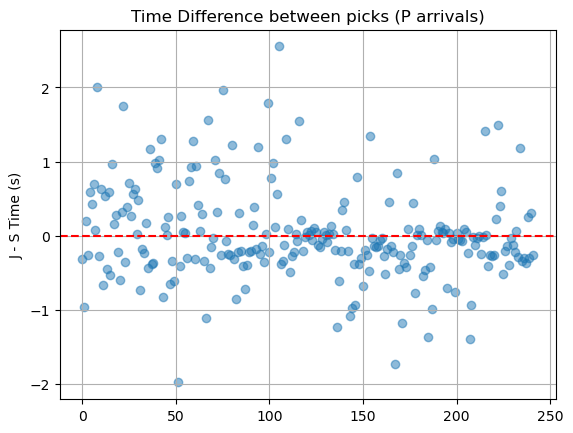

In [ ]:
#visualize the different picks
plt.scatter(all_picks.index,all_picks['time_diff (s)'], alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.grid(True)
# Add titles and labels
plt.title('Time Difference between picks (P arrivals)')
plt.ylabel('J - S Time (s)')


